In [1]:
from yuning_util.dev_mode import DevMode
dev_mode = DevMode('k-seq')
dev_mode.on()

from importlib import reload

In [2]:
from k_seq.utility import file_tools
reload(file_tools)

doped_table = file_tools.read_pickle('/home/yuning/byo_doped.pkl')

In [21]:
N = 1e7

large_typle = [{'value': i, 'index':i} for i in range(int(N))]
large_dict = {k['index']: k for k in large_typle}

In [20]:
%timeit sub_dict = {i['index']: i for i in large_typle}

617 ms ± 856 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%timeit sub_dict = {key: large_dict[key]['value'] for key in large_dict.keys()}

831 ms ± 783 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Module test playground

In [163]:
sample_set = k_seq.data.pre_processing.load_count_files(
    file_root='/mnt/storage/projects/k-seq/input/byo_counts/',
    pattern='counts*.txt',
    name_pattern='counts-{byo}{rep}.txt',
    sort_fn = lambda sample: (sample.metadata['byo'], sample.metadata['rep'])
)
sequence_set = k_seq.data.pre_processing.convert_samples_to_sequences(sample_set=sample_set, remove_spike_in=False)

IndexError: list index out of range

In [161]:
sample_set

[]

In [66]:
'concentration, digit'[:'concentration, digit'.find(', digit')]

'concentration'

In [76]:
string = 'tetingddsring as this'
prefix = 'ing'
postfix = 'hi'
sample_start = 8
start_ix = string.find(prefix, sample_start) + len(prefix)
sample_start = start_ix
end_ix = string.find(postfix, sample_start)
sample_start = end_ix + len(postfix)
print(string[start_ix:end_ix])
print(string[sample_start:])

 as t
s


['AAC', '12342343', 'DDIS']

In [ ]:
pattern_ix = 0
str_ix = 0

while pattern_ix < len(test_regex_template) and str_ix < len(test_str):
    

# Samples overview
Evaluate the quality and consistency of count files from joined reads, in order to determined valid samples. Following analysis can be applied:
- Overview of samples: survey total, unique, fraction of external standards info in each sample
- Dispersion of external standard
- [System error] Deviation of shared sequences in each sample
## Sample counts

In [1]:
import util
print(util.color.BOLD + util.color.BLUE + 
      'Overview of k-seq samples'
      + util.color.END)

import k_seq.k_seq_eval as k_seq_eval
import importlib

importlib.reload(k_seq_eval)

root = '/mnt/storage/projects/ribozyme_predict/data/count-file/'
sampleList = [
        'counts-1A.txt','counts-1B.txt','counts-1C.txt','counts-1D.txt','counts-1E.txt','counts-1F.txt',
        'counts-2A.txt','counts-2B.txt','counts-2C.txt','counts-2D.txt','counts-2E.txt','counts-2F.txt',
        'counts-3A.txt','counts-3B.txt','counts-3C.txt','counts-3D.txt','counts-3E.txt','counts-3F.txt',
        'counts-4A.txt','counts-4B.txt','counts-4C.txt','counts-4D.txt','counts-4E.txt','counts-4F.txt'
    ] # 6 replicates in 4 BTO concentration 250, 50, 10, 2 \mu M

sampleInfo = k_seq_eval.sample_overview(dircList=[root+sample for sample in sampleList],
                                           stdSeq='AAAAACAAAAACAAAAACAAA')

print('|index|sample name| total counts | unique counts | ext. std. counts | ext. std. percent|')
print('|:--:|:-----:|:-----:|:----:|:----:|:-----:|')
for ix,sample in enumerate(sampleInfo):
    print('|%i|%s|%i|%i|%i|%.3f|' %(ix+1, sample['name'], sample['total'], sample['unique'], sample['stdCount'], sample['stdPct']))
util.dump_pickle(data=sampleInfo, dirc='/mnt/storage/projects/ribozyme_predict/data/k_seq/sampleInfo.pkl',
                log='sample information surveyed on all samples')

Overview of k-seq samples


ModuleNotFoundError: No module named 'k_seq'

In [5]:
import util
qFactor = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/qFactorList.pkl')

qFactorList_ext_new.pkl:
The NEW q_factor (reciprical of the old one) only based on external spike-in, within edit distance 2, using k_seq.k_seq.get_q_factor()


## Dispersion of external standard sequences

Distribution of external standard peak


/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/axes/_base.py:3245: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


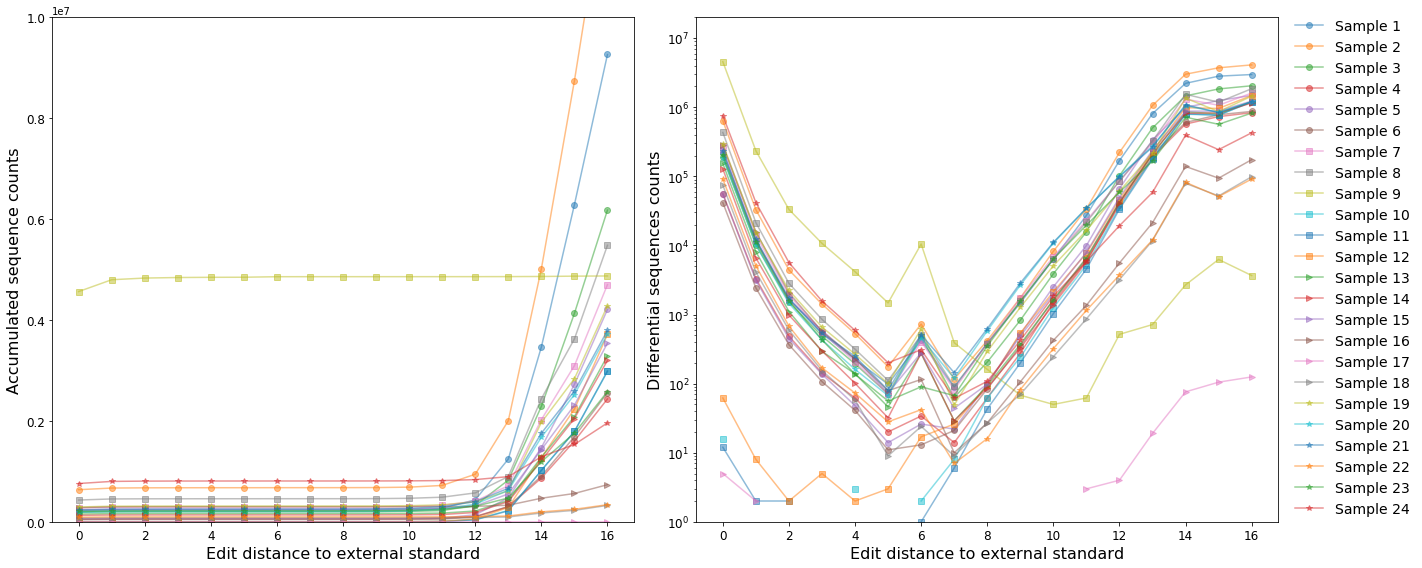

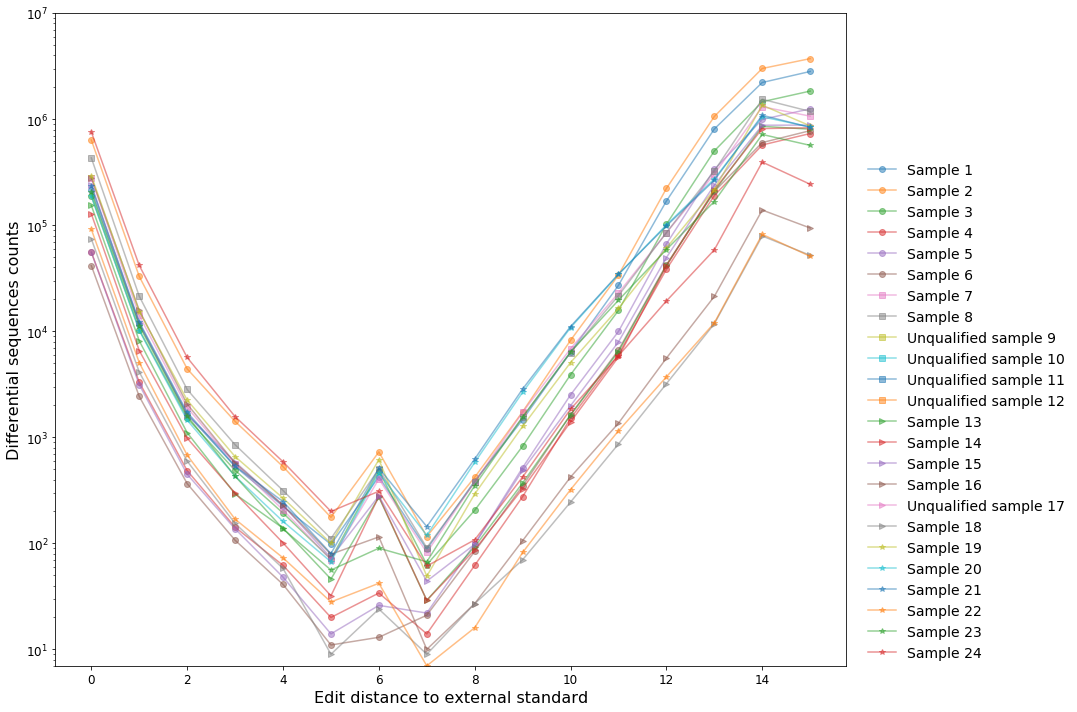

In [39]:
print(color.BOLD + color.BLUE + 'Distribution of external standard peak' + color.END)

from yntools import dump_pickle
import k_seq.k_seq_eval as k_seq_eval

import importlib

importlib.reload(k_seq_eval)

def plot_all():
    import matplotlib.pyplot as plt
    
    symbolList = ['-o' for i in range(6)] + ['-s' for i in range(6)] + ['->' for i in range(6)] + ['-*' for i in range(6)]
    
    plt.figure()
    
    fig, ax = plt.subplots(1,2, figsize=[18,8])
    for sampleIx,sample in enumerate(kSeqList):
        ax[0].plot([i for i in range(maxDist+1)], extStdCountList[sampleIx],
                   symbolList[sampleIx], label='Sample %i' %(sampleIx+1), alpha=0.5)
    ax[0].set_xlabel('Edit distance to external standard', fontsize=16)
    ax[0].tick_params(labelsize=12)
    ax[0].set_ylim([0, 10**7])
    ax[0].set_ylabel('Accumulated sequence counts', fontsize=16)
    
    for sampleIx,sample in enumerate(kSeqList):
        diffList = [extStdCountList[sampleIx][0]] + \
                   [extStdCountList[sampleIx][i+1] - extStdCountList[sampleIx][i] for i in range(maxDist)]
        ax[1].plot([i for i in range(maxDist+1)], diffList,
                   symbolList[sampleIx], label='Sample %i' %(sampleIx+1), alpha=0.5)
    ax[1].set_xlabel('Edit distance to external standard', fontsize=16)
    ax[1].tick_params(labelsize=12)
    ax[1].set_yscale('log')
    ax[1].set_ylim([0, 2*10**7])
    ax[1].legend(loc=[1.02,0], fontsize=14, frameon=False)
    ax[1].set_ylabel('Differential sequences counts', fontsize=16)
    plt.tight_layout()
    # fig.savefig('/home/yuning/Work/ribozyme_pred/fig/extStdErr.jpeg', dpi=300)
    plt.show()

    
def plot_qualified():
    import matplotlib.pyplot as plt
    
    symbolList = ['-o' for i in range(6)] + ['-s' for i in range(6)] + ['->' for i in range(6)] + ['-*' for i in range(6)]
    
    plt.figure(figsize=[12, 10])
    
    ax = plt.gca()
    
    blackList = [8, 9, 10, 11, 16]

    for sampleIx,sample in enumerate(kSeqList):
        if not sampleIx in blackList:
            diffList = [extStdCountList[sampleIx][0]] + \
                       [extStdCountList[sampleIx][i+1] - extStdCountList[sampleIx][i] for i in range(maxDist-1)]
            ax.plot([i for i in range(maxDist)], diffList,
                       symbolList[sampleIx], label='Sample %i' %(sampleIx+1), alpha=0.5)
        else:
            ax.plot([], [], symbolList[sampleIx], label='Unqualified sample %i' %(sampleIx+1), alpha=0.5)
            

    ax.set_xlabel('Edit distance to external standard', fontsize=16)
    ax.tick_params(labelsize=12)
    ax.set_yscale('log')
    ax.set_ylim([0, 10**7])
    ax.legend(loc=[1.02,0], fontsize=14, frameon=False)
    ax.set_ylabel('Differential sequences counts', fontsize=16)
    plt.tight_layout()
    plt.show()


root = '/mnt/storage/projects/ribozyme_predict/data/count-file/'
kSeqList = ['counts-1A.txt','counts-1B.txt','counts-1C.txt','counts-1D.txt','counts-1E.txt','counts-1F.txt',
            'counts-2A.txt','counts-2B.txt','counts-2C.txt','counts-2D.txt','counts-2E.txt','counts-2F.txt',
            'counts-3A.txt','counts-3B.txt','counts-3C.txt','counts-3D.txt','counts-3E.txt','counts-3F.txt',
            'counts-4A.txt','counts-4B.txt','counts-4C.txt','counts-4D.txt','counts-4E.txt','counts-4F.txt']
stdSeq = 'AAAAACAAAAACAAAAACAAA'
maxDist = 16

# extStdCountList = [k_seq_eval.get_seq_relaxed_count(sampleDirc = root + sample, centerSeq=stdSeq, maxDist=maxDist) for sample in kSeqList]

plot_all()
plot_qualified()

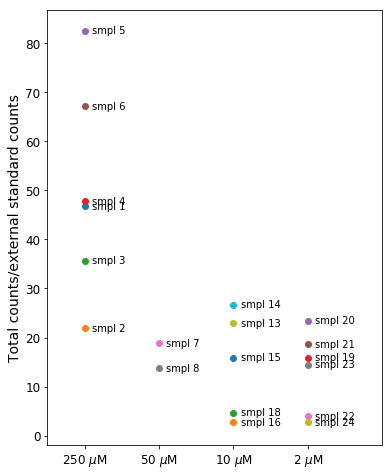

In [26]:
import plot
rndToCal = [
    [1, 2, 3, 4, 5, 6],
    [7, 8],
    [13, 14, 15, 16, 18],
    [19, 20, 21, 22, 23, 24]
]

fig = plt.figure(figsize=[6,8])
ax = fig.add_subplot(111)
for ix, rndBatch in enumerate(rndToCal):
    for rnd in rndBatch:
        ax.scatter(ix, qFactor[rnd-1][2]/qFactor[rnd-1][1])
        ax.text(s='smpl %i' %rnd, x=ix+0.1, y=qFactor[rnd-1][2]/qFactor[rnd-1][1], va='center', fontsize=10)
ax.set_xlim([-0.5, 4])
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels([r'250 $\mu$M', r'50 $\mu$M', r'10 $\mu$M', r'2 $\mu$M'], fontsize=12)
ax.set_ylabel('Total counts/external standard counts', fontsize=14)
plot.set_ticks_size(ax,fontSizeY=12)

plt.show()


### [Todo] Fit sequences with distance <5 into bimonial distribution

## Sample qualities

Mean exclude rounds themselves:


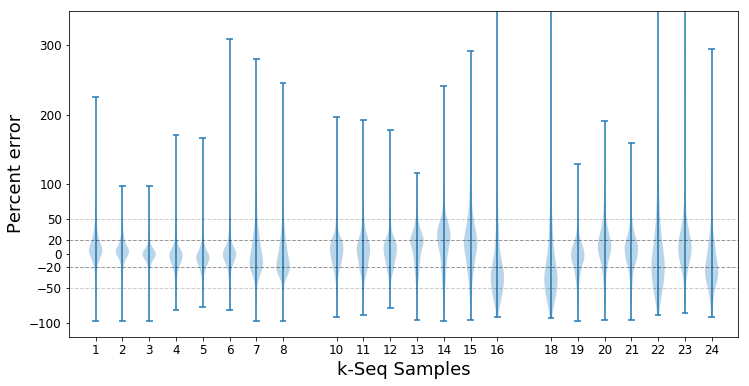

In [8]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from collections import Counter


def find_complete(countTable):
    completeList = []
    for seq in countTable:
        flag = True
        for rndBatch in rndToCount:
            for rnd in rndBatch:
                if seq[1][rnd] == 0:
                    flag = False
                    break
        if flag:
            completeList.append([seq[0],seq[1][0]*10481955*0.0005, seq[1]])
    return completeList

def count_total(completeList):
    total = [0 for i in range(25)]
    for rndBatch in rndToCount:
        for rnd in rndBatch:
            total[rnd] = sum([seq[2][rnd] for seq in completeList])
    return total

def normalize_list(completeList, total):
    for ix,seq in enumerate(completeList):
        for rndBatch in rndToCount:
            for rnd in rndBatch:
                completeList[ix][2][rnd] = seq[2][rnd]/total[rnd]
    return completeList

def pct_error(completeListNorm):
    pctError = [[] for i in range(25)]
    for seq in completeListNorm:
        for rndBatch in rndToCount:
            mean = np.mean([seq[2][rnd] for rnd in rndBatch])
            for rnd in rndBatch:
                pctError[rnd].append((seq[2][rnd]-mean)/mean * 100)
    return pctError

def pct_error_exclude(completeListNorm):
    pctError = [[] for i in range(25)]
    for seq in completeListNorm:
        for rndBatch in rndToCount:
            for rnd in rndBatch:
                mean = np.mean([seq[2][x] for x in rndBatch if x != rnd])
                pctError[rnd].append((seq[2][rnd]-mean)/mean * 100)
    return pctError

def pct_err_plot(errorList):
    plt.figure(figsize=[12,6])
    rndPos = [1, 2, 3, 4, 5, 6,
          7, 8, 10, 11, 12,
          13, 14, 15, 16, 18,
          19, 20, 21, 22, 23, 24]

    plt.plot([0,25], [20,20], '--', lw=1, c = 'k', alpha = 0.4)
    plt.plot([0,25], [-20,-20], '--', lw=1, c = 'k', alpha = 0.4)
    plt.plot([0,25], [50,50], '--', lw=1, c = 'k', alpha = 0.2)
    plt.plot([0,25], [-50,-50], '--', lw=1, c = 'k', alpha = 0.2)

    plt.violinplot([rnd for rnd in errorList if len(rnd)!=0], positions=rndPos)
    plt.xlim([0,25])
    plt.ylim([-120, 350])
    plt.yticks([-100, -50, -20, 0, 20, 50, 100, 200, 300], fontsize=12)
    plt.xticks([i+1 for i in range(24)], fontsize=12)
    plt.xlabel('k-Seq Samples', fontsize = 18)
    plt.ylabel('Percent error', fontsize = 18)
    plt.xticks(rndPos)
    
    fig = plt.gcf()
    fig.savefig('/home/yuning/Work/ribozyme_pred/fig/k-seq_sample_err_violin.jpeg', dpi=300)
    plt.show()

if __name__=='__main__':
        
   # with open('/home/yuning/Work/ribozyme_pred/data/k_seq/count_table_all_in_r5_INT_STD.pkl', 'rb') as readFile:
   #     countTable = pickle.load(readFile)
   # 
   # rndToCount = [[1, 2, 3, 4, 5, 6],
   #               [7, 8, 10, 11, 12],
   #               [13, 14, 15, 16, 18],
   #               [19, 20, 21, 22, 23, 24]]
   # 
   # completeList = find_complete(countTable)
   # 
   # total = count_total(completeList)
   # 
   # completeListNorm = normalize_list(completeList, total)
    
   # print('Mean includes rounds themselves:')
   # pct_err_plot(pct_error(completeListNorm))
    
        
    print('Mean exclude rounds themselves:')
    pct_err_plot(pct_error_exclude(completeListNorm))
    
    
    

# Analysis on raw fraction file
- Generate normalization factors based on spike-in (ng) in each k-seq sample (42 fmol = 1 ng, 17 fmol = 0.4 ng, 12 fmol = 0.3 ng, and 4 fmol = 0.1 ng)
- The orginial Round 5 has total RNA of 2000 ng


## Get raw count file

In [27]:
print(util.color.BOLD + util.color.BLUE + \
'Get raw count file' + util.color.END)

import k_seq.k_seq as k_seq
import importlib

importlib.reload(k_seq)


root = '/mnt/storage/projects/ribozyme_predict/data/count-file/'
kSeqList = ['counts-1A.txt','counts-1B.txt','counts-1C.txt','counts-1D.txt','counts-1E.txt','counts-1F.txt',
            'counts-2A.txt','counts-2B.txt','counts-2C.txt','counts-2D.txt','counts-2E.txt','counts-2F.txt',
            'counts-3A.txt','counts-3B.txt','counts-3C.txt','counts-3D.txt','counts-3E.txt','counts-3F.txt',
            'counts-4A.txt','counts-4B.txt','counts-4C.txt','counts-4D.txt','counts-4E.txt','counts-4F.txt']

# For a selected sample with only 3 replicates in each concentration
blackList = [3, 4, 5,
             6, 7, 8,
             15, 16, 17,
             21, 22, 23]

seqList = k_seq.get_count_list(initDirc=root + 'R5c-counts.txt',
                               sampleDircList = [root + name for name in kSeqList],
                               blackList=blackList)

util.dump_pickle(data=seqList, dirc='/mnt/storage/projects/ribozyme_predict/data/k_seq/seqRawCount_select3Reps.pkl', 
                 log='contains sequences in rnd 5 AND selected k-seq samples (3 replicates per concentration), raw count only', overwrite=False)

Get raw count file
Candidate sequences imported from initial pool
Calculating /mnt/storage/projects/ribozyme_predict/data/count-file/counts-1A.txt ...
Calculating /mnt/storage/projects/ribozyme_predict/data/count-file/counts-1B.txt ...
Calculating /mnt/storage/projects/ribozyme_predict/data/count-file/counts-1C.txt ...
Calculating /mnt/storage/projects/ribozyme_predict/data/count-file/counts-2D.txt ...
Calculating /mnt/storage/projects/ribozyme_predict/data/count-file/counts-2E.txt ...
Calculating /mnt/storage/projects/ribozyme_predict/data/count-file/counts-2F.txt ...
Calculating /mnt/storage/projects/ribozyme_predict/data/count-file/counts-3A.txt ...
Calculating /mnt/storage/projects/ribozyme_predict/data/count-file/counts-3B.txt ...
Calculating /mnt/storage/projects/ribozyme_predict/data/count-file/counts-3C.txt ...
Calculating /mnt/storage/projects/ribozyme_predict/data/count-file/counts-4A.txt ...
Calculating /mnt/storage/projects/ribozyme_predict/data/count-file/counts-4B.txt ...

TypeError: dump_pickle() missing 1 required positional argument: 'overwrite'

## Deviation on raw fraction for each sequences

/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


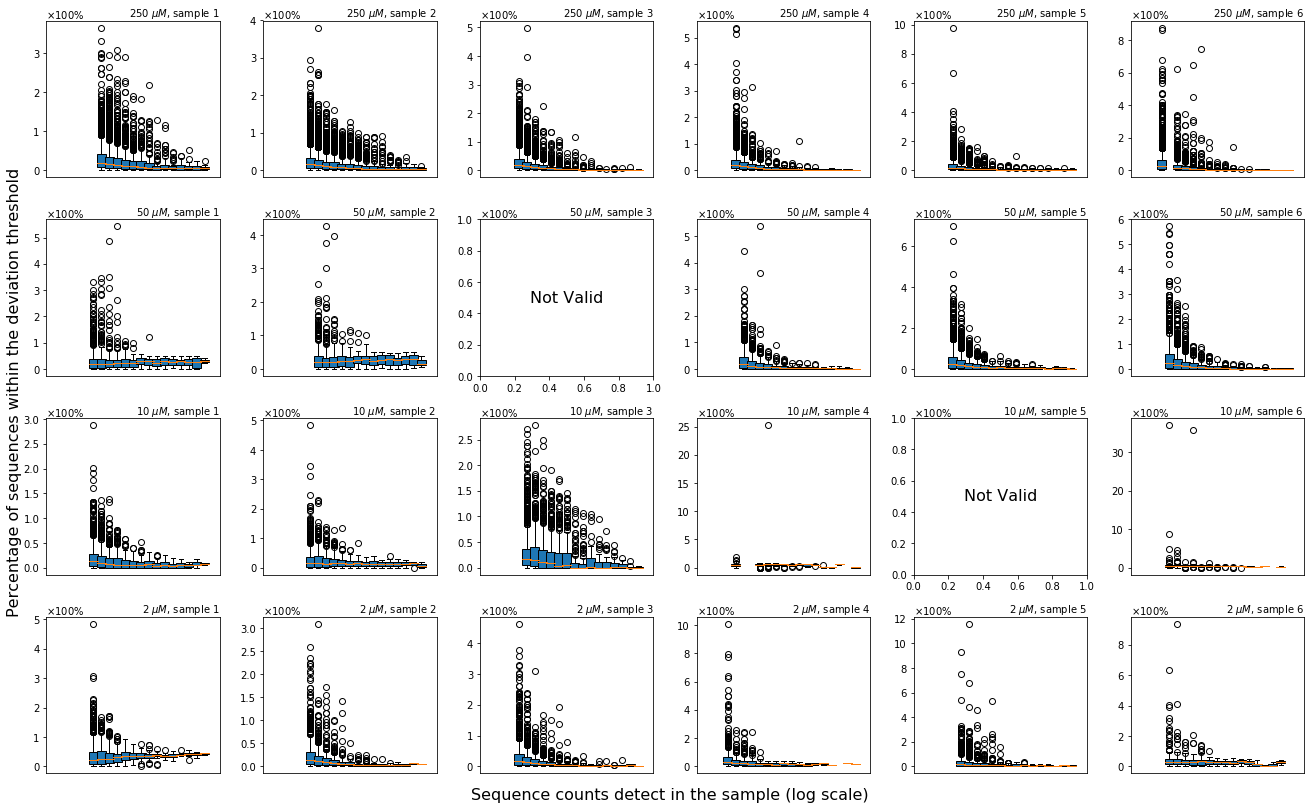

In [129]:
def get_validSeqList():
    '''
    Get a list of valid sequences which contains at least 1 concentration with >=3 replicates
    '''
    import numpy as np
    import util
    
    def validSeq_screen(seq, blackList):
        rndList = [
            [1, 2, 3, 4, 5, 6],
            [7, 8, 9, 10, 11, 12],
            [13, 14, 15, 16, 17, 18],
            [19, 20, 21, 22, 23, 24]
        ]
        flag = False
        medDev = []
        for rndSet in rndList:
            if sum([1 for rnd in rndSet if not(np.isnan(seq['kSeqCounts'][rnd-1])) and (rnd not in blackList)]) >= 3:
                flag = True
                rndComp = [seq['kSeqCounts'][rnd-1]/sampleInfo[rnd-1]['total'] if rnd not in blackList else np.nan for rnd in rndSet]
                med = np.nanmedian(rndComp)
                medDev += list((rndComp-med)/med)
            else:
                medDev += [np.nan for i in range(6)]
        return flag, medDev
    
    seqList = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/seqRawCount.pkl')
    sampleInfo = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/sampleInfo.pkl')

    validSeqList = []
    for seq in seqList:
        flag, medDev = validSeq_screen(seq, blackList)
        if flag:
            validSeqList.append(seq)
            validSeqList[-1]['pctDevToMed'] = medDev

    return validSeqList


def plot_scatter():
    import matplotlib.pyplot as plt
    
    fig,ax = plt.subplots(4, 6, figsize=(18, 11))
    
    concentrations = [250, 50, 10, 2]
    
    for x in range(4):
        for y in range(6):
            rnd = x*6 + y + 1
            ax[x,y].text(x=1, y=1, s=r'%i $\mu M$, sample %i' %(concentrations[x], y+1),
                        ha='right', va='bottom', transform = ax[x,y].transAxes)
            ax[x,y].text(x=0, y=1, s=r'$\times$100%',
                        ha='left', va='bottom', transform = ax[x,y].transAxes)
            if rnd in blackList:
                ax[x,y].text(s='Not Valid', x=0.5, y=0.5, ha='center', va='center', fontsize=16)
            else:
                xdata = [seq['kSeqCounts'][rnd-1] for seq in validSeqList if not(np.isnan(seq['kSeqCounts'][rnd-1]))]
                ydata = [seq['pctDevToMed'][rnd-1] for seq in validSeqList if not(np.isnan(seq['kSeqCounts'][rnd-1]))]
                ax[x,y].scatter(xdata, ydata, alpha=0.3, s=1)
                ax[x,y].set_xticks([0, int(np.max([xdata])/10**5)*10**5])
                ax[x,y].plot([0, np.max([xdata])], [0.5, 0.5], 'k--', alpha=0.8)
                ax[x,y].plot([0, np.max([xdata])], [-0.5, -0.5], 'k--', alpha=0.8)
                ax[x,y].set_xscale('log')
                ax[x,y].set_ylim([-1.5, 10])
    
    fig.text(x=0.5, y=0, s='Sequence counts detect in the sample (log scale)', ha='center', va='top', fontsize=16)
    fig.text(x=0, y=0.5, s='Percent deviation to median', ha='right', va='center', fontsize=16, rotation='vertical')
    plt.tight_layout()
    
    plt.savefig('/home/yuning/Work/ribozyme_pred/fig/exp_fit_test/rawComp_dev_scatter.jpeg', dpi=300, bbox_inches='tight')
    plt.show()
    
    
def plot_devThreshold():
    import matplotlib.pyplot as plt
    
    def dev_thresholding(countList, devList, threshold, bins):
        pctList = []
        for i in range(len(bins)-1):
            binnedDev = [devList[ix] for ix,count in enumerate(countList) if bins[i] <= count < bins[i+1]]
            if len(binnedDev)==0:
                pctList.append(np.nan)
            else:
                pctList.append(sum([1 for dev in binnedDev if abs(dev) <= threshold])/len(binnedDev))
        return pctList, bins[:-1]
    
    concentrations = [250, 50, 10, 2]
    fig,ax = plt.subplots(4, 6, figsize=(18, 11))
    for x in range(4):
        for y in range(6):
            rnd = x*6 + y + 1
            ax[x,y].text(x=1, y=1, s=r'%i $\mu M$, sample %i' %(concentrations[x], y+1),
                        ha='right', va='bottom', transform = ax[x,y].transAxes)
            ax[x,y].text(x=0, y=1, s=r'$\times$100%',
                        ha='left', va='bottom', transform = ax[x,y].transAxes)
            if rnd in blackList:
                ax[x,y].text(s='Not Valid', x=0.5, y=0.5, ha='center', va='center', fontsize=16)
            else:
                xdata = [seq['kSeqCounts'][rnd-1] for seq in validSeqList if not(np.isnan(seq['kSeqCounts'][rnd-1]))]
                ydata = [seq['pctDevToMed'][rnd-1] for seq in validSeqList if not(np.isnan(seq['kSeqCounts'][rnd-1]))]
                bins = np.logspace(0, 5, 20)
                for threshold in [0.2, 0.5, 1.0]:
                    devPctList, binPos = dev_thresholding(countList=xdata, devList=ydata, threshold=threshold, bins=bins)
                    ax[x,y].plot(binPos, devPctList, 'o-', markersize=2, label=str(threshold))
                ax[x,y].set_xscale('log')
                ax[x,y].set_ylim([0.0, 1.0])
    fig.text(x=0.5, y=0, s='Sequence counts detect in the sample (log scale)', ha='center', va='top', fontsize=16)
    fig.text(x=0, y=0.5, s='Percentage of sequences within the deviation threshold', ha='right', va='center', fontsize=16, rotation=90)
    fig.text(x=0.8, y=0.0, s='---20%', color='#1f77b4', ha='left', va='top', fontsize=16)
    fig.text(x=0.85, y=0.0, s='---50%', color='#ff7f0e', ha='left', va='top', fontsize=16)
    fig.text(x=0.9, y=0.0, s='---100%', color='#2ca02c', ha='left', va='top', fontsize=16)
    
    plt.tight_layout()

    plt.savefig('/home/yuning/Work/ribozyme_pred/fig/exp_fit_test/rawComp_dev_thresh.jpeg', dpi=300, bbox_inches='tight')
    plt.show()

    
def plot_boxplot():
    def dev_binning(countList, devList, bins):
        binList = []
        for i in range(len(bins)-1):
            binnedDev = [np.abs(devList[ix]) for ix,count in enumerate(countList) if bins[i] <= count < bins[i+1]]
            if len(binnedDev)==0:
                binList.append([])
            else:
                binList.append(binnedDev)
        return binList, bins[:-1]
    
    def set_colors(bp, c):
        from matplotlib.pyplot import setp
        setp(bp['boxes'][0], color=c)
        setp(bp['caps'][0], color=c)
        setp(bp['caps'][1], color=c)
        setp(bp['whiskers'][0], color=c)
        setp(bp['whiskers'][1], color=c)
        setp(bp['fliers'][0], markerfacecolor=c, marker='.', markersize=1, alpha=0.3)
        # setp(bp['fliers'][1], color=c, alpha=0.3)
        setp(bp['medians'][0], color='w')
    
    concentrations = [250, 50, 10, 2]
    fig,ax = plt.subplots(4, 6, figsize=(18, 11))
    for x in range(4):
        for y in range(6):
            rnd = x*6 + y + 1
            ax[x,y].text(x=1, y=1, s=r'%i $\mu M$, sample %i' %(concentrations[x], y+1),
                        ha='right', va='bottom', transform = ax[x,y].transAxes)
            ax[x,y].text(x=0, y=1, s=r'$\times$100%',
                        ha='left', va='bottom', transform = ax[x,y].transAxes)
            if rnd in blackList:
                ax[x,y].text(s='Not Valid', x=0.5, y=0.5, ha='center', va='center', fontsize=16)
            else:
                xdata = [seq['kSeqCounts'][rnd-1] for seq in validSeqList if not(np.isnan(seq['kSeqCounts'][rnd-1]))]
                ydata = [seq['pctDevToMed'][rnd-1] for seq in validSeqList if not(np.isnan(seq['kSeqCounts'][rnd-1]))]
                bins = np.logspace(0, 5, 20)
                binList, binPos = dev_binning(countList=xdata, devList=ydata, bins=bins)
                bp = ax[x,y].boxplot(binList, positions=np.log10(binPos), patch_artist=True, widths=0.3)
                set_colors(bp, '#2C73B4')
                ax[x,y].set_xticks([])
                # ax[x,y].set_ylim([0.0, 1.0])
    fig.text(x=0.5, y=0, s='Sequence counts detect in the sample (log scale)', ha='center', va='top', fontsize=16)
    fig.text(x=0, y=0.5, s='Percentage of sequences within the deviation threshold', ha='right', va='center', fontsize=16, rotation=90)
    
    plt.tight_layout()
    plt.show()


# blackList = [9, 16, 17, 18, 22, 24]
blackList = [9, 17]
# validSeqList = get_validSeqList()
# plot_scatter()
# plot_devThreshold()
plot_boxplot()

In [128]:
bins = np.logspace(0, 5, 21)
np.log10(bins)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ])

## Number of detections

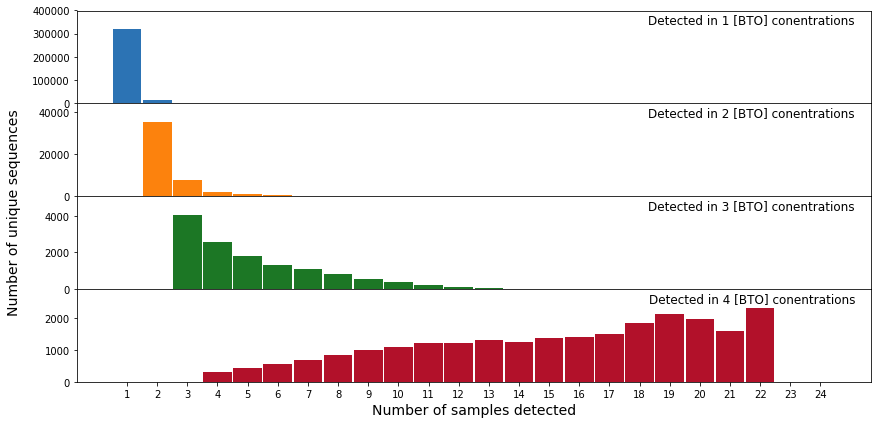

In [115]:
def count_detect():
    seqList = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/seqRawCount.pkl')
    
    validRndList = [
        [1, 2, 3, 4, 5, 6],
        [7, 8, 10, 11, 12],
        [13, 14, 15, 16, 18],
        [19, 20, 21, 22, 23, 24]
            ]
    detectTable = [[0 for i in range(24)] for j in range(4)]
    
    for seq in seqList:
        seq['numDetected'] = int(np.sum([1 for count in seq['kSeqCounts'] if ~np.isnan(count)]))
        seq['conDetected'] = 0
        for rndSet in validRndList:
            if sum([1 for rnd in rndSet if ~np.isnan(seq['kSeqCounts'][rnd-1])])>0:
                seq['conDetected'] += 1
        if seq['conDetected']>0:
            detectTable[seq['conDetected']-1][seq['numDetected']-1] += 1
    return detectTable
    
def plot_detect():
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(4, 1, figsize=(12,6), sharex=True, gridspec_kw={'hspace':0.0})
    colorList = ['#2C73B4', '#FC820D', '#1C7725', '#B2112A']
    for ix in range(4):
        ax[ix].bar(x=[i+1 for i in range(24)], height = detectTable[ix], width=0.95, align='center', color=colorList[ix])
        ax[ix].text(s='Detected in %i [BTO] conentrations' %(ix+1), x=0.98, y=0.9,
                    va='center', ha='right', fontsize=12, transform = ax[ix].transAxes)
        ax[ix].set_ylim([0, max(detectTable[ix])*1.25])
    ax[3].set_xlabel('Number of samples detected', fontsize=14)
    ax[3].set_xticks([i+1 for i in range(24)])
    fig.text(s='Number of unique sequences', x=0, y=0.5, ha='right', va='center', fontsize=14, rotation=90)
    plt.tight_layout()
    fig.savefig('/home/yuning/Work/ribozyme_pred/fig/exp_fit_test/dataPoint_dist.jpeg', dpi=300, bbox_inches='tight')
    
    plt.show()
    


# detectTable = count_detect()
plot_detect()

In [2]:
import numpy as np
import util

def encode_seq(seq, mask):
    return [sum(~np.isnan(seq['kSeqCounts'][i*6:i*6+6]) & mask[i*6:i*6+6]) for i in range(4)]

seqList = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/seqRawCount.pkl')
blackList = [9, 16, 17, 18, 22, 24]
mask = [False if i+1 in blackList else True for i in range(24)]
encodeList = {}
for seq in seqList:
    encode = encode_seq(seq, mask)
    if str(encode) not in encodeList.keys():
        encodeList[str(encode)] = 1
    else:
        encodeList[str(encode)] += 1

seqRawCount.pkl:
contains sequences in rnd 5 AND k-seq samples, raw count only


In [5]:
encodeProfile = list(encodeList.items())
sort_fn = lambda x: x[1]
encodeProfile.sort(key=sort_fn, reverse=True)

In [56]:
sum([profile[1] for profile in encodeProfile[:16]])/sum([profile[1] for profile in encodeProfile[:]])

0.9088662689672198

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
ax.bar([i for i in range(len(encodeProfile))], [profile[1] for profile in encodeProfile], width=0.8, color='#2C73B4')
ax.set_xticks([])
plot.set_ticks_size(ax)

axIn = fig.add_axes([0.3, 0.4, 0.58, 0.45])
axIn.bar([i for i in range(len(encodeProfile[:16]))], [profile[1] for profile in encodeProfile[:16]], width=0.8, color='#2C73B4')
plot.set_ticks_size(axIn)
axIn.set_xticks([i for i in range(len(encodeProfile[:16]))])
axIn.set_xticklabels([profile[0] for profile in encodeProfile[:16]], fontsize=12, rotation=90)

ax.set_ylabel('Number of unique ribozymes', fontsize=14)
ax.set_xlabel('Sample configurations', fontsize=14)

plt.show()

In [16]:
encodeProfile = list(encodeList.items())
encodeProfile = [encode for encode in encodeProfile if sum(int(i) for i in encode[0][1:-1].split(',')) > 1]
sort_fn = lambda x: x[1]
encodeProfile.sort(key=sort_fn, reverse=True)

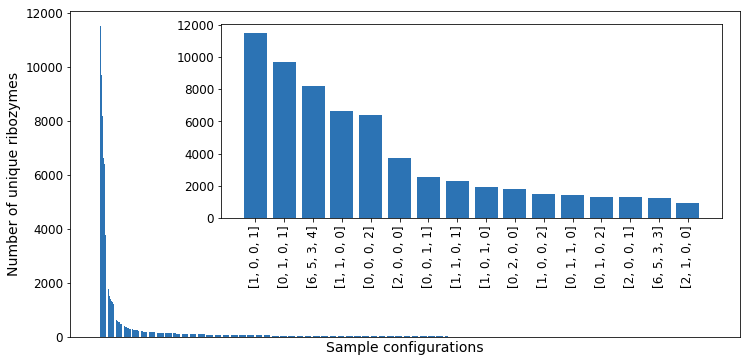

In [21]:
import matplotlib.pyplot as plt
import plot

fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
ax.bar([i for i in range(len(encodeProfile))], [profile[1] for profile in encodeProfile], width=0.8, color='#2C73B4')
ax.set_xticks([])
plot.set_ticks_size(ax)

axIn = fig.add_axes([0.3, 0.4, 0.58, 0.45])
axIn.bar([i for i in range(len(encodeProfile[:16]))], [profile[1] for profile in encodeProfile[:16]], width=0.8, color='#2C73B4')
plot.set_ticks_size(axIn)
axIn.set_xticks([i for i in range(len(encodeProfile[:16]))])
axIn.set_xticklabels([profile[0] for profile in encodeProfile[:16]], fontsize=12, rotation=90)

ax.set_ylabel('Number of unique ribozymes', fontsize=14)
ax.set_xlabel('Sample configurations', fontsize=14)

plt.show()

In [23]:
sum([profile[1] for profile in encodeProfile[:50]])/sum([profile[1] for profile in encodeProfile[:]])

0.789901069972826

In [24]:
encodeProfile = [encode for encode in encodeProfile if sum(int(i) for i in encode[0][1:-1].split(',')) > 1]

len(encodeProfile)

683

In [30]:
pos = [i for i in range(len(encodeProfile))]
numOfDetection = [sum(int(i) for i in encode[0][1:-1].split(',')) for encode in encodeProfile]
cumAbun = np.array([sum(k[1] for k in encodeProfile[:i+1]) for i in range(len(encodeProfile))])
cumAbun = cumAbun / sum([encode[1] for encode in encodeProfile])

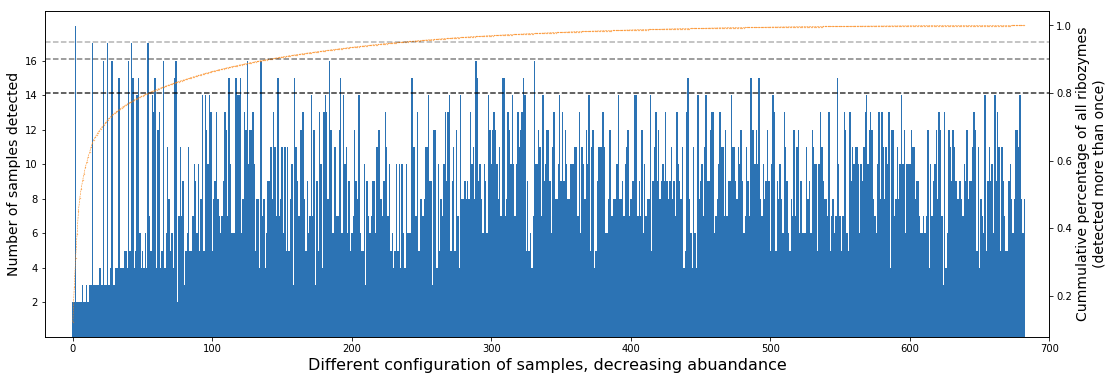

In [46]:
fig = plt.figure(figsize=[18, 6])
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.bar(pos, numOfDetection, width=1, color='#2C73B4')
ax2.plot(pos, cumAbun, '.--', lw=0.5, markersize=0.5, color='#FC820D')
ax2.plot([-20, 700], [0.8, 0.8], 'k--', alpha=0.8)
ax2.plot([-20, 700], [0.9, 0.9], 'k--', alpha=0.5)
ax2.plot([-20, 700], [0.95, 0.95], 'k--', alpha=0.3)
ax1.set_xlim([-20, 700])
ax1.set_xticks([0, 100, 200, 300, 400, 500, 600, 700])
ax1.set_xlabel('Different configuration of samples, decreasing abuandance', fontsize=16)
ax1.set_ylabel('Number of samples detected', fontsize=14)
ax1.set_yticks([2, 4, 6, 8, 10, 12, 14, 16])
ax2.set_ylabel('Cummulative percentage of all ribozymes\n(detected more than once)', fontsize=14)
plt.show()

## Quantification factors
### External quantification factor, based on spike-in

In [5]:
from util import color as color
print(color.BOLD + color.BLUE + \
'Calculate quantification factor based on spike-in' + color.END)

import importlib
import k_seq.k_seq as k_seq
importlib.reload(k_seq)
import util

root = '/mnt/storage/projects/ribozyme_predict/count-file/'
kSeqList = ['counts-1A.txt','counts-1B.txt','counts-1C.txt','counts-1D.txt','counts-1E.txt','counts-1F.txt',
            'counts-2A.txt','counts-2B.txt','counts-2C.txt','counts-2D.txt','counts-2E.txt','counts-2F.txt',
            'counts-3A.txt','counts-3B.txt','counts-3C.txt','counts-3D.txt','counts-3E.txt','counts-3F.txt',
            'counts-4A.txt','counts-4B.txt','counts-4C.txt','counts-4D.txt','counts-4E.txt','counts-4F.txt']
stdSeq = 'AAAAACAAAAACAAAAACAAA'
maxDist = 0
ng = [1 for i in range(6)] + [0.4 for i in range(6)] + [0.3 for i in range(6)] + [0.1 for i in range(6)]

qFactorList = [k_seq.get_q_factor(root+sample, std = stdSeq, amount = ng[sampleIx], maxDist=maxDist) 
               for sampleIx, sample in enumerate(kSeqList)]
    
util.dump_pickle(qFactorList, '/mnt/storage/projects/ribozyme_predict/k_seq/qFactorList_ext_edit0_new.pkl',
                 log='The NEW q_factor (reciprical of the old one) only based on external spike-in, within edit distance 0, using k_seq.k_seq.get_q_factor()',
                overwrite=True)


Calculate quantification factor based on spike-in
Data has been saved to /mnt/storage/projects/ribozyme_predict/k_seq/qFactorList_ext_edit0_new.pkl


In [6]:
qFactorList

[(46.731382658681305, 216062, 10096876),
 (21.941798218316013, 636252, 13960513),
 (35.677284650645184, 188705, 6732482),
 (47.76426121774729, 55693, 2660135),
 (82.55371796717536, 55568, 4587345),
 (67.17600751119457, 41538, 2790357),
 (7.521424639276815, 276112, 5191889),
 (5.527611430213187, 431593, 5964196),
 (0.4274428270784487, 4564486, 4877642),
 (80029.3, 16, 3201172),
 (107119.06666666667, 12, 3213572),
 (25822.21290322581, 62, 4002443),
 (6.884248317127898, 153755, 3528292),
 (8.014908903483768, 128051, 3421057),
 (4.768285208304551, 238857, 3796461),
 (0.8325247304161839, 280525, 778480),
 (21.479999999999997, 5, 358),
 (1.4069260459674275, 74357, 348716),
 (1.5899146451033246, 293832, 4671678),
 (2.3447310038824183, 187512, 4396652),
 (1.8673259591091487, 235505, 4397646),
 (0.4023423580976948, 91489, 368099),
 (1.4496541035782557, 204541, 2965137),
 (0.276933495297847, 759014, 2101964)]

In [15]:
0.5*(276112/5191889/0.4 + 431593/5964196/0.4)

0.15693175126777023

In [14]:
((qFactorList[6][1]/qFactorList[6][2])/0.4 + (qFactorList[7][1]/qFactorList[7][2])/0.4)/2

0.15693175126777023

### Use internal standard to quantify sample 10~12

In [96]:
import util
print(util.color.BOLD + util.color.BLUE + \
'Find the internal standard candidate' + util.color.END)

import numpy as np

def find_complete(seqList):
    completeList = []
    rndToCount = [[1, 2, 3, 4, 5, 6],
                  [7, 8, 10, 11, 12],
                  [13, 14, 15, 16, 18],
                  [19, 20, 21, 22, 23, 24]]
    
    for seq in seqList:
        flag = True
        for rndBatch in rndToCount:
            for rnd in rndBatch:
                if np.isnan(seq['kSeqCounts'][rnd-1]):
                    flag = False
                    break
        if flag:
            completeList.append(seq)
    return completeList

def error_survey(completeList):
    
    rndToCount = [[1, 2, 3, 4, 5, 6],
                  [7, 8, 10, 11, 12],
                  [13, 14, 15, 16, 18],
                  [19, 20, 21, 22, 23, 24]]
    
    def count_total(completeList):
        total = [0 for i in range(24)]
        for rndBatch in rndToCount:
            for rnd in rndBatch:
                total[rnd-1] = sum([seq['kSeqCounts'][rnd-1] for seq in completeList])
        return total

    def normalize_list(completeList, total):
        for ix,seq in enumerate(completeList):
            completeList[ix]['normPct'] = [0 for i in range(24)]
            for rndBatch in rndToCount:
                for rnd in rndBatch:
                    completeList[ix]['normPct'][rnd-1] = seq['kSeqCounts'][rnd-1]/total[rnd-1]
            completeList[ix]['minCount'] = np.nanmin(seq['kSeqCounts'])
        return completeList
    
    def pct_error(completeListNorm):
        for ix,seq in enumerate(completeListNorm):
            for rndBatch in rndToCount:
                mean = np.mean([seq['normPct'][rnd-1] for rnd in rndBatch])
                pctError = []
                for rnd in rndBatch:
                    pctError.append(abs(seq['normPct'][rnd-1]-mean)/mean * 100)
            completeListNorm[ix]['meanPctErr'] = np.mean(pctError)
            completeListNorm[ix]['maxPctErr'] = np.max(pctError)
        return completeListNorm
    
    def pct_error_to_std(completeListNorm):
        for ix,seq in enumerate(completeListNorm):
            for rndBatch in rndToCount:
                mean = np.mean([seq['kSeqCounts'][rnd-1]/qFactorList[rnd-1][1] for rnd in rndBatch])
                pctError = []
                for rnd in rndBatch:
                    pctError.append(abs(seq['kSeqCounts'][rnd-1]/qFactorList[rnd-1][1]-mean)/mean * 100)
            completeListNorm[ix]['meanPctErrStd'] = np.mean(pctError)
            completeListNorm[ix]['maxPctErrStd'] = np.max(pctError)
        return completeListNorm

    completeList = normalize_list(completeList, total=count_total(completeList))
    completeList = pct_error(completeList)
    completeList = pct_error_to_std(completeList)
    
    return completeList


qFactorList = util.load_pickle(dirc='/mnt/storage/projects/ribozyme_predict/data/k_seq/qFactorList_raw.pkl')
seqList = util.load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/seqRawCount.pkl')

completeList = find_complete(seqList)
completeList = error_survey(completeList)


Find the internal standard candidate
qFactorList_raw.pkl:
Quantification factor only based on external spike-in, within edit distance 2, using k_seq.k_seq.get_q_factor()
seqRawCount.pkl:
contains sequences in rnd 5 AND k-seq samples, raw count only


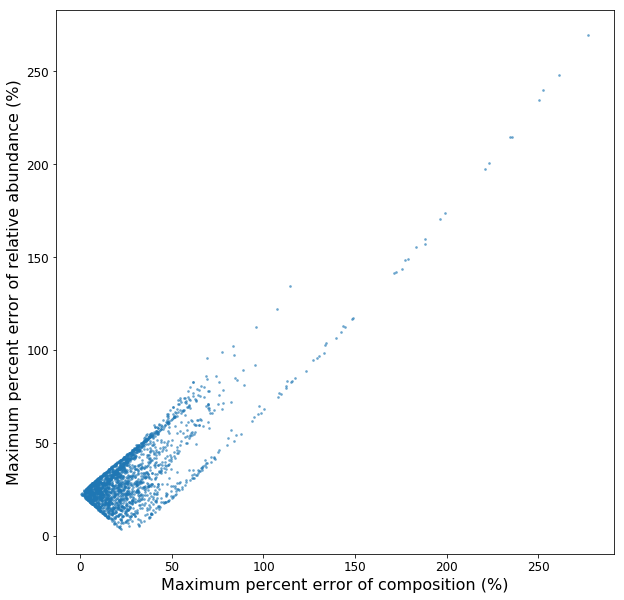

In [81]:
import numpy as np
import matplotlib.pyplot as plt


def plot():
    plt.figure(figsize = [10,10])
    plt.scatter([seq['maxPctErr'] for seq in completeList], [seq['maxPctErrStd'] for seq in completeList], s=3, alpha=0.5)
    plt.xlabel('Maximum percent error of composition (%)', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel('Maximum percent error of relative abundance (%)', fontsize=16)
    fig = plt.gcf()
    # fig.savefig('/home/yuning/Work/ribozyme_pred/fig/k-seq_int_std_choice.jpeg', dpi=300)
    plt.show()


plot()


In [98]:
stdList = [seq for seq in completeList if seq['initCount']>200 and seq['meanPctErr']<10]
print(len(stdList))

168


In [79]:
stdList[1]

{'initCount': 6539,
 'kSeqCounts': [38316,
  56436,
  27792,
  11817,
  22132,
  11916,
  37786,
  46449,
  nan,
  23527,
  23840,
  29312,
  24896,
  21572,
  23161,
  5144,
  nan,
  3013,
  46516,
  28093,
  28168,
  3028,
  19449,
  14220],
 'maxPctErr': 6.975314808194989,
 'maxPctErrStd': 35.8804404452468,
 'meanPctErr': 4.638097752889572,
 'meanPctErrStd': 17.940220222623392,
 'minCount': 3013.0,
 'normPct': [0.004569225083705327,
  0.0049622873721498345,
  0.004939826963862051,
  0.005256359273957869,
  0.005613629970676316,
  0.0050345480863562735,
  0.01044551997602722,
  0.010737416320900547,
  0,
  0.008137319295100004,
  0.00815071436703583,
  0.00823221404205866,
  0.00831114723943789,
  0.007290616153723446,
  0.007459823851402602,
  0,
  0,
  0,
  0.013691662673412226,
  0.013093386565075199,
  0.0123149618829895,
  0,
  0.01209558553728928,
  0],
 'seq': 'GTTACCCTGGTCATCGAGTGA'}

In [102]:
def effective_count(seq, rnd):
    return seq['kSeqCounts'][rnd-1] / (seq['kSeqCounts'][6]/qFactorList[6][1] + seq['kSeqCounts'][7]/qFactorList[7][1]) * 2

rnd = 12

print('%0.8r + %0.7r' %(np.mean([effective_count(seq, rnd) for seq in stdList])/qFactorList[rnd-1][2]/0.4,
                        2*np.std([effective_count(seq, rnd)/qFactorList[rnd-1][2]/0.4 for seq in stdList])))

0.246523 + 0.10027


Select sequences with error rate < 10% and counts > 200 

201


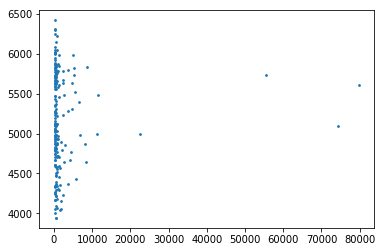

0.199257 + 0.04633


In [99]:
stdList = [seq for seq in completeListError if seq[1]>200 and seq[-1]<10]
print(len(stdList))

rnd = 12
q = 3.872634788303044e-05

plt.figure()
plt.scatter([seq[1] for seq in stdList], [seq[2][rnd]*2/(seq[2][7] + seq[2][8]) for seq in stdList], s=3)
plt.show()
print('%0.8r + %0.7r' %(np.mean([seq[2][rnd]*2/(seq[2][7] + seq[2][8]) for seq in stdList]) * q,
                        2*np.std([seq[2][rnd]*2/(seq[2][7] + seq[2][8]) for seq in stdList]) * q))

In [108]:
(1/np.median(x)-1/x)/(1/x)

array([-0.29674033, -0.42774016, -0.01093044,  0.32415282,  1.1530677 ,
        0.01093044])



## Generate normalized table
**Functions**

**readSeq** <br/>
read seq-counts from file and return a dictionary normalzed counts

args:
- dirc: directory to count file
- countCutoff: minimum counts for seq to be counted
- normalize: flag if needs to be normalized
- quantFactor: nomralization factor $\frac{\text{seq_counts}}{\text{total_counts}\times\text{q_factor}}$

return:
- allSeqCounts: dict of {seq: [normalized] counts}
- uniques and totals

**alignCounts** <br/>
Put all normalized counts into a summary list


**countAll**

- calculate and summarize counts from masterDirc and otherDirc to masterCounts file for each seq
- masterCounts is an overview table of seq-rounds
- masterCounts structure:

[seq,

[,,,,,,]] 


## Only includes the seqs showed up in round 5

**Only focus on the sequences detected in original round 5**

**Goal**
- make a list of sequences showed up in Round 5
- look up count of listed sequences in each k-seq sample
- convert count to ng based on normalization factor

**Output**<br/>

A List of sequences in Round 5 and corresponding counts detected in reach k-seq rounds <br/>
[[seq, [round 5, k-seq rounds * 24]],...]


In [122]:
from yntools import load_pickle, dump_pickle
from k_seq import countAll
from __future__ import division


if __name__=='__main__':
    
    root = '/mnt/storage/projects/ribozyme_predict/data/count-file/'
    kSeqList = ['counts-1A.txt','counts-1B.txt','counts-1C.txt','counts-1D.txt','counts-1E.txt','counts-1F.txt',
                'counts-2A.txt','counts-2B.txt','counts-2C.txt','counts-2D.txt','counts-2E.txt','counts-2F.txt',
                'counts-3A.txt','counts-3B.txt','counts-3C.txt','counts-3D.txt','counts-3E.txt','counts-3F.txt',
                'counts-4A.txt','counts-4B.txt','counts-4C.txt','counts-4D.txt','counts-4E.txt','counts-4F.txt']
    r5Dirc = 'R5c-counts.txt'
    
    quantFactor = load_pickle('/home/yuning/Work/ribozyme_pred/data/k_seq/norm_factor_ng.pkl')
    # adjust with round 10, 11, 12 with internal standard
    quantFactor[1][3], quantFactor[1][4], quantFactor[1][5] = 0.205811, 0.206396, 0.199257
        
    testNorm = [0.0005] + [i for j in quantFactor for i in j]

    #------- Count R5 and kSeq data------------
    
    counts, uniqs, tots = countAll(primDirc = root + r5Dirc, 
                                   otherDirc = [root + sample for sample in kSeqList],
                                   primMin=1, otherMin=1, normList = testNorm)
    
    # Save count table
    
    outDirc = '/home/yuning/Work/ribozyme_pred/data/k_seq/count_table_all_in_r5_INT_STD.pkl'
    dump_pickle(counts, outDirc)
    print('Count Table saved to %s' %outDirc)
        
    del counts

Calculating /mnt/chen-nas/SequenceData/Abe's files/counts-aminoacyl/R5c-counts.txt ...
Calculating /mnt/chen-nas/SequenceData/Abe's files/counts-aminoacyl/counts-1A.txt ...
Calculating /mnt/chen-nas/SequenceData/Abe's files/counts-aminoacyl/counts-1B.txt ...
Calculating /mnt/chen-nas/SequenceData/Abe's files/counts-aminoacyl/counts-1C.txt ...
Calculating /mnt/chen-nas/SequenceData/Abe's files/counts-aminoacyl/counts-1D.txt ...
Calculating /mnt/chen-nas/SequenceData/Abe's files/counts-aminoacyl/counts-1E.txt ...
Calculating /mnt/chen-nas/SequenceData/Abe's files/counts-aminoacyl/counts-1F.txt ...
Calculating /mnt/chen-nas/SequenceData/Abe's files/counts-aminoacyl/counts-2A.txt ...
Calculating /mnt/chen-nas/SequenceData/Abe's files/counts-aminoacyl/counts-2B.txt ...
Calculating /mnt/chen-nas/SequenceData/Abe's files/counts-aminoacyl/counts-2C.txt ...
Calculating /mnt/chen-nas/SequenceData/Abe's files/counts-aminoacyl/counts-2D.txt ...
Calculating /mnt/chen-nas/SequenceData/Abe's files/co

# Read raw counts

In [ ]:
from yntools import load_pickle, dump_pickle
from k_seq import countAll
from __future__ import division


if __name__=='__main__':
    
    root = '/mnt/storage/projects/ribozyme_predict/data/count-file/'
    kSeqList = ['counts-1A.txt','counts-1B.txt','counts-1C.txt','counts-1D.txt','counts-1E.txt','counts-1F.txt',
                'counts-2A.txt','counts-2B.txt','counts-2C.txt','counts-2D.txt','counts-2E.txt','counts-2F.txt',
                'counts-3A.txt','counts-3B.txt','counts-3C.txt','counts-3D.txt','counts-3E.txt','counts-3F.txt',
                'counts-4A.txt','counts-4B.txt','counts-4C.txt','counts-4D.txt','counts-4E.txt','counts-4F.txt']
    r5Dirc = 'R5c-counts.txt'
    
    quantFactor = load_pickle('/home/yuning/Work/ribozyme_pred/data/k_seq/norm_factor_ng.pkl')
    # adjust with round 10, 11, 12 with internal standard
    quantFactor[1][3], quantFactor[1][4], quantFactor[1][5] = 0.205811, 0.206396, 0.199257
        
    testNorm = [0.0005] + [i for j in quantFactor for i in j]

    #------- Count R5 and kSeq data------------
    
    counts, uniqs, tots = countAll(primDirc = root + r5Dirc, 
                                   otherDirc = [root + sample for sample in kSeqList],
                                   primMin=1, otherMin=1, normList = testNorm)
    
    # Save count table
    
    outDirc = '/home/yuning/Work/ribozyme_pred/data/k_seq/count_table_all_in_r5_INT_STD.pkl'
    dump_pickle(counts, outDirc)
    print('Count Table saved to %s' %outDirc)
        
    del counts

# Data cleaning

## Profile survey

### Survey on INT datasets with some rounds cleaning

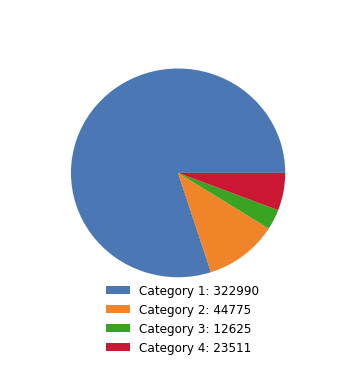

In [137]:
from yntools import load_pickle
import matplotlib.pyplot as plt

if __name__=='__main__':
    countTable = load_pickle('/home/yuning/Work/ribozyme_pred/data/k_seq/labeled_count_table_non_empty_in_r5_INT_STD.pkl')
    # unique = 9123282
    profileSize = [sum([1 for seq in countTable if seq[3]==(profileNum+1)]) for profileNum in range(4)]
    # values = [unique - sum(profileSize)] + profileSize
    labels = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
    labels = [label+': %i' %profileSize[i] for i,label in enumerate(labels)]
    plt.figure(figsize=[6,6])
    plt.pie(x=profileSize, radius=0.8, colors=['#4B78B4', '#EF8528', '#3AA322', '#CB1733'])
    plt.legend(labels=labels, fontsize=12, frameon=False, loc=[0.27, -0.07])
    plt.savefig('/home/yuning/Work/ribozyme_pred/fig/categories_pct.jpeg', dpi=300, bbox_inches='tight')
    plt.show()
    

In [17]:
values

[8719381, 322990, 44775, 12625, 23511]

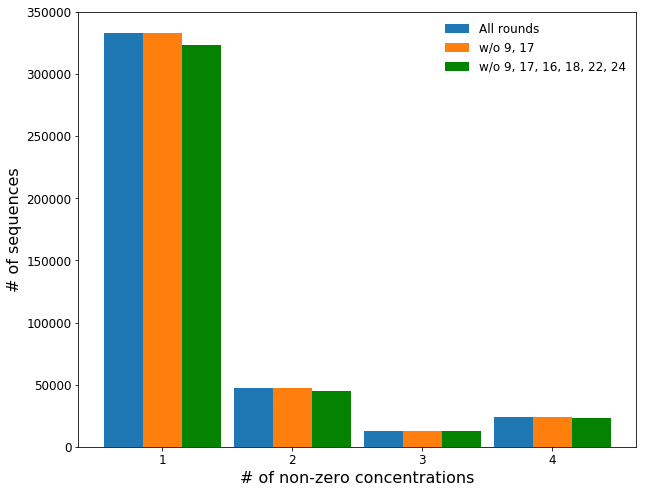

In [10]:
import numpy as np
import pandas as pd
from yntools import load_pickle
import matplotlib.pyplot as plt


def count_profile(countTable, rndToCount, title):
    
    for seq in countTable:
        seq.append('True')
        seq.append(0)
        for rndBatch in rndToCount:
            counter = 0
            for rnd in rndBatch:
                if seq[1][rnd] != 0:
                    counter = 1
                else:
                    seq[-2] = False
            seq[-1] += counter
    
    # Print out results       
    print('Based on %s:' %title)  
    print('Total unique sequences: %i' %len(countTable))
    print('Sequences has non-empty profile %i' %len([i for i in countTable if i[-1]>0]))
    print('Sequences has full profile %i' %len([i for i in countTable if i[-1]==4]))
    print('Sequences has complete profile %i' %len([i for i in countTable if i[-2]]))
    print('')
    
    counter = []
    for i in [1,2,3,4]:
        counter.append(sum([1 for seq in countTable if seq[-1]==i]))
    
    return counter

def plot_bars(counts):
    plt.figure(figsize=[10,8])
    w = 0.3
    plt.bar(np.array([1, 2, 3, 4])-w, counts[0], width = w, align='center', label='All rounds')
    plt.bar(np.array([1, 2, 3, 4]), counts[1], width = w, align='center', label='w/o 9, 17')
    plt.bar(np.array([1, 2, 3, 4])+w, counts[2], width = w, align='center', label='w/o 9, 17, 16, 18, 22, 24', color='#048300')
    plt.xticks([1, 2, 3, 4], fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('# of non-zero concentrations', fontsize=16)
    plt.ylabel('# of sequences', fontsize=16)
    plt.legend(fontsize=12, frameon=False)
    fig = plt.gcf()
    fig.savefig('/home/yuning/Work/ribozyme_pred/fig/seq_prof_dis.jpeg', dpi=300)
    plt.show()


if __name__=='__main__':
    # countTable = load_pickle('/home/yuning/Work/ribozyme_pred/data/k_seq/count_table_all_in_r5_INT_STD.pkl')
    # print('Data loaded!')
    # counts = []
    # counts.append(count_profile(countTable, title = 'all rounds',
    #                             rndToCount = [[1, 2, 3, 4, 5, 6],
    #                                           [7, 8, 9 ,10, 11, 12],
    #                                           [13, 14, 15, 16, 17, 18],
    #                                           [19, 20, 21, 22, 23, 24]]))
    # 
    # counts.append(count_profile(countTable, title = 'w/o 9, 17',
    #                             rndToCount = [[1, 2, 3, 4, 5, 6],
    #                                           [7, 8, 10, 11, 12],
    #                                           [13, 14, 15, 16, 18],
    #                                           [19, 20, 21, 22, 23, 24]]))
    # 
    # counts.append(count_profile(countTable, title = 'w/o 9, 17, 16, 18, 22, 24',
    #                             rndToCount = [[1, 2, 3, 4, 5, 6],
    #                                           [7, 8, 10, 11, 12],
    #                                           [13, 14, 15],
    #                                           [19, 20, 21, 23]]))

    plot_bars(counts)



### Survey on INT+EXT rounds (w/o 9, 17, 16, 18, 22, 24)

Based on cleaned rounds (w/o 9, 17, 16, 18, 22, 24):
Total unique sequences: 9123282
Sequences has non-empty profile 403901
Sequences has full profile 23511
Sequences has complete profile 8183


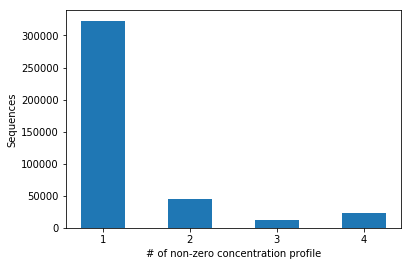

In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from yntools import load_pickle, dump_pickle
from k_seq import count_profile

import matplotlib.pyplot as plt


def profile_output(countTable):
    # Print out results       
    print('Based on cleaned rounds (w/o 9, 17, 16, 18, 22, 24):')  
    print('Total unique sequences: %i' %len(countTable))
    print('Sequences has non-empty profile %i' %len([i for i in countTable if i[-1]>0]))
    print('Sequences has full profile %i' %len([i for i in countTable if i[-1]==4]))
    print('Sequences has complete profile %i' %len([i for i in countTable if i[-2]]))
    
    profileDist = [i[-1] for i in countTable if i[-1]>0]
    # Plot barplot for profile numbers
    counter = []
    for i in [1,2,3,4]:
        counter.append(sum([1 for seq in countTable if seq[-1]==i]))
    plt.bar([1, 2, 3, 4], counter, width = 0.5, align='center', tick_label=[1,2,3,4])
    plt.xlabel('# of non-zero concentration profile')
    plt.ylabel('Sequences')
    plt.show()

if __name__=='__main__':
    countTable = load_pickle('/home/yuning/Work/ribozyme_pred/data/k_seq/count_table_all_in_r5_INT_STD.pkl')
    
    rndToCount = [[1, 2, 3, 4, 5, 6],
                 [7, 8, 10, 11, 12],
                 [13, 14, 15],
                 [19, 20, 21, 23]]
    
    countTable = count_profile(countTable, rndToCount)
    profile_output(countTable)
    
    dump_pickle(countTable, '/home/yuning/Work/ribozyme_pred/data/k_seq/labeled_count_table_all_in_r5_INT_STD.pkl')
    dump_pickle([seq for seq in countTable if seq[-1]>0],
                '/home/yuning/Work/ribozyme_pred/data/k_seq/labeled_count_table_non_empty_in_r5_INT_STD.pkl')
    
    

### Survey on EXT rounds (w/o 9, 17, 16, 18, 22, 24, 10, 11, 12)

Based on cleaned rounds (w/o 9, 17, 16, 18, 22, 24, 10, 11, 12):
Total unique sequences: 9123282
Sequences has non-empty profile 387764
Sequences has full profile 21821
Sequences has complete profile 8585


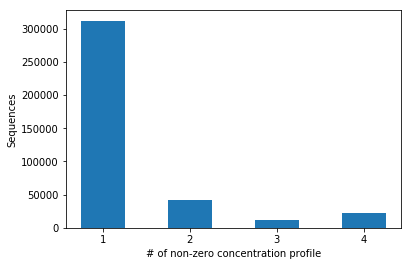

In [6]:
import numpy as np
import pandas as pd
from ribo import load_pickle, dump_pickle
import matplotlib.pyplot as plt

def count_profile(countTable, rndToCount):
    for seq in countTable:
        seq.append('True')
        seq.append(0)
        for rndBatch in rndToCount:
            counter = 0
            for rnd in rndBatch:
                if seq[1][rnd] != 0:
                    counter = 1
                else:
                    seq[-2] = False
            seq[-1] += counter
    return countTable

def profile_output(countTable):
    # Print out results       
    print('Based on cleaned rounds (w/o 9, 17, 16, 18, 22, 24, 10, 11, 12):')  
    print('Total unique sequences: %i' %len(countTable))
    print('Sequences has non-empty profile %i' %len([i for i in countTable if i[-1]>0]))
    print('Sequences has full profile %i' %len([i for i in countTable if i[-1]==4]))
    print('Sequences has complete profile %i' %len([i for i in countTable if i[-2]]))
    
    profileDist = [i[-1] for i in countTable if i[-1]>0]
    # Plot barplot for profile numbers
    counter = []
    for i in [1,2,3,4]:
        counter.append(sum([1 for seq in countTable if seq[-1]==i]))
    plt.bar([1, 2, 3, 4], counter, width = 0.5, align='center', tick_label=[1,2,3,4])
    plt.xlabel('# of non-zero concentration profile')
    plt.ylabel('Sequences')
    plt.show()

if __name__=='__main__':
    countTable = load_pickle('/home/yuning/Work/ribozyme_pred/data/k_seq/count_table_all_in_r5_EXT_STD.pkl')
    
    rndToCount = [[1, 2, 3, 4, 5, 6],
                 [7, 8],
                 [13, 14, 15],
                 [19, 20, 21, 23]]
    
    countTable = count_profile(countTable, rndToCount)
    profile_output(countTable)
    
    dump_pickle(countTable, '/home/yuning/Work/ribozyme_pred/data/k_seq/labeled_count_table_all_in_r5_EXT_STD.pkl')
    dump_pickle([seq for seq in countTable if seq[-1]>0],
                '/home/yuning/Work/ribozyme_pred/data/k_seq/labeled_count_table_non_empty_in_r5_EXT_STD.pkl')
    

## Seqs w/ complete profiles

load!


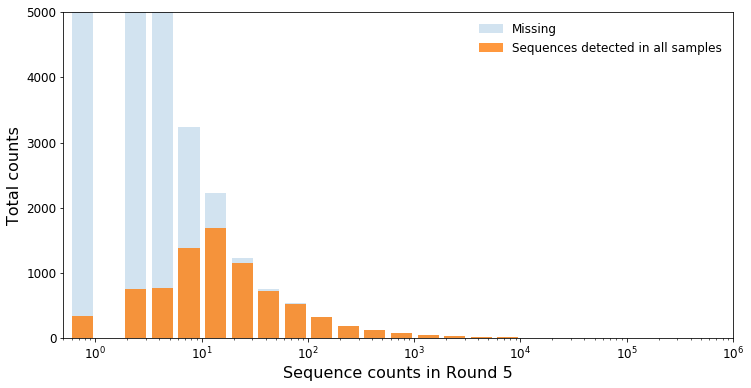

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from yntools import load_pickle

def complete_profile_label(countTable, rndToCount):
    completeList = []
    for seq in countTable:
        seq.append(True)
        for rndBatch in rndToCount:
            for rnd in rndBatch:
                if seq[1][rnd] == 0:
                    seq[-1] = False
        if seq[-1]== True:
            completeList.append(seq[1][0]*10481955*0.0005)
    return completeList

if __name__=='__main__':
    # countTable = load_pickle('/home/yuning/Work/ribozyme_pred/data/k_seq/count_table_all_in_r5_INT_STD.pkl')
    print('load!')
    completeList = []
#     rndToCount = [[1, 2, 3, 4, 5, 6],
#                  [7, 8, 9 ,10, 11, 12],
#                  [13, 14, 15, 16, 17, 18],
#                  [19, 20, 21, 22, 23, 24]]
#     
#     completeList.append(complete_profile_label(countTable, rndToCount))
#     
#     rndToCount = [[1, 2, 3, 4, 5, 6],
#                  [7, 8 ,10, 11, 12],
#                  [13, 14, 15, 16, 18],
#                  [19, 20, 21, 22, 23, 24]]
#     
#     completeList.append(complete_profile_label(countTable, rndToCount)) 
   
    rndToCount = [[1, 2, 3, 4, 5, 6],
                 [7, 8, 10, 11, 12],
                 [13, 14, 15],
                 [19, 20, 21, 23]]
    completeList.append(complete_profile_label(countTable, rndToCount))
#
#     rndToCount = [[1, 2, 3, 4, 5, 6],
#                  [7, 8],
#                  [13, 14, 15],
#                  [19, 20, 21, 23]]
#     
#     completeList.append(complete_profile_label(countTable, rndToCount))

    abdSeq = [seq[1][0]*10481955*0.0005 for seq in countTable if seq[1][0]*10481955*0.0005 >= 0]
    
    plt.figure(figsize = [12,6])
    bins = [0] + list(np.logspace(-1, np.log10(100000), 25))
    plt.hist(abdSeq, bins=bins, alpha=0.2, rwidth=0.8, label='Missing', align='mid')
    
    plt.hist(completeList[0], bins=bins, alpha=0.8, rwidth=0.8, label=['Sequences detected in all samples'], align='mid')
    plt.xscale('log')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim([0.5,10**6])
    plt.ylim([0, 5000])
    # plt.yscale('log', nonposy='clip') 
    plt.xlabel('Sequence counts in Round 5', fontsize=16)
    plt.ylabel('Total counts', fontsize=16)
    plt.legend(fontsize=12, frameon=False)
    fig = plt.gcf()
    fig.savefig('/home/yuning/Work/ribozyme_pred/fig/complete_dis.jpeg', dpi=300)
    plt.show()
    
#    del countTable

## Abundance distribution of sequences with different profile number in Round 5
Highly abundance tend to have higher profile

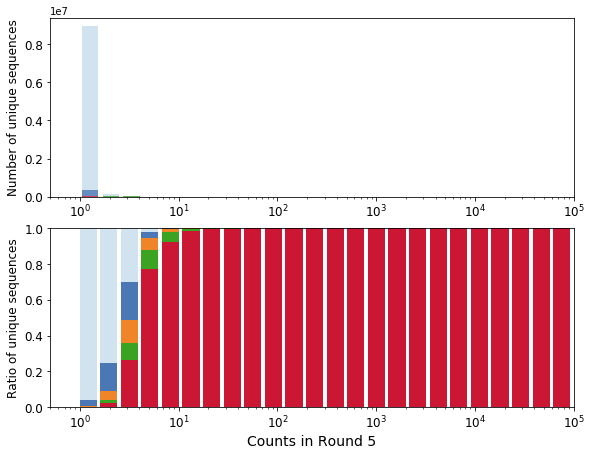

In [138]:
from yntools import load_pickle


def profile_divide(labeledCountTable):
    otherProfileList = [[],[],[],[],[]]
    allList = []
    for seq in labeledCountTable:
        allList.append(seq[1][0]*10481955*0.0005)
        if seq[3] >= 1:
            otherProfileList[seq[3]].append(seq[1][0]*10481955*0.0005)
            
    print('Sequences are separated into profiles!')
    return allList, otherProfileList

def plot_profile_dist():
    import matplotlib.pyplot as plt
    import numpy as np
    from plot import set_ticks_size
    
    ratio = 0.3
    fig = plt.figure(figsize = [12,6])
    plt.tight_layout()
    ax = fig.add_axes([0, 0, 1, 1])
    bins = [0] + list(np.logspace(-1, np.log10(50000), 25))
    
    ax.hist(allList, bins=bins, alpha=0.2, rwidth=0.8, label='Missing')
    ax.hist([otherProfileList[4], otherProfileList[3], otherProfileList[2], otherProfileList[1]],
             stacked = True, bins=bins, alpha=0.8, rwidth=0.8,
             label=['Category 4','Category 3', 'Category 2', 'Category 1'])
    ax.set_xscale('log')
    ax.set_xlim([0.5,10**5])
    ax.set_ylim([0,0.75*10**5])
    set_ticks_size(ax, 12)

    
    axInset = fig.add_axes([0.52, 0.5, 0.45, 0.45])
    axInset.hist(allList, bins=bins, alpha=0.2, rwidth=0.8, label='Missing')
    axInset.hist([otherProfileList[4], otherProfileList[3], otherProfileList[2], otherProfileList[1]],
             stacked = True, bins=bins, alpha=0.8, rwidth=0.8,
             label=['Category 4','Category 3', 'Category 2', 'Category 1'])
    axInset.set_xscale('log')
    axInset.set_xlim([0.5,10**5])
    # axInset.set_ylim([0,0.75*10**5])
    set_ticks_size(axInset, 12)
    
    fig.text(x=0.5, y=-0.07, s='Sequence counts in Round 5', fontsize=16, ha='center', va='center')
    fig.text(x=-0.07, y=0.5, s='Total counts', fontsize=16, ha='center', va='center', rotation='vertical')
    handles, lables = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], lables[::-1], fontsize=12, frameon=False, loc='lower right')
    fig.savefig('/home/yuning/Work/ribozyme_pred/fig/prof_dis.jpeg', dpi=300, bbox_inches='tight')
    plt.show()

    
    
def plot_profile_dist_2():
    import matplotlib.pyplot as plt
    import numpy as np
    from plot import set_ticks_size
    
    fig, ax = plt.subplots(2,1,figsize = [8,6])
    plt.tight_layout()
    
    bins = list(np.logspace(np.log10(0.99), np.log10(100000), 25))
    ax[0].hist(allList, bins=bins, alpha=0.2, rwidth=0.8, label='not detected')
    ax[0].hist([otherProfileList[4], otherProfileList[3], otherProfileList[2], otherProfileList[1]],
             stacked = True, bins=bins, alpha=0.8, rwidth=0.8,
             label=['Category 4','Category 3', 'Category 2', 'Category 1'], 
             color=['#4B78B4', '#EF8528', '#3AA322', '#CB1733'][::-1])
    ax[0].set_xscale('log')
    # ax[0].set_ylim([0, 100])
    ax[0].set_xlim([0.5,10**5])
    ax[0].set_ylabel('Number of unique sequences', fontsize=12)
    set_ticks_size(ax[0], 12)
    
    
    # ax[1].hist(allList, bins=bins, alpha=0.2, rwidth=0.8, label='Missing')
    allListHist = np.histogram(allList, bins=bins)
    ax[1].bar(bins[:-1], [1 for i in allListHist[0]], align='edge', 
              width=[(bins[ix+1]-bins[ix])*0.8 for ix in range(len(bins[:-1]))], alpha=0.2)
    histoCate = []
    histoBottom = [0 for i in bins[:-1]]
    colors=['#4B78B4', '#EF8528', '#3AA322', '#CB1733']
    
    for category in [4,3,2,1]:
        histo = np.histogram(otherProfileList[category], bins=bins)[0]/allListHist[0]
        ax[1].bar(bins[:-1], histo, align='edge', 
              width=[(bins[ix+1]-bins[ix])*0.8 for ix in range(len(bins[:-1]))], bottom=histoBottom,
                 color=colors[category-1])
        histoBottom += histo
        
    set_ticks_size(ax[1], 12)
    ax[1].set_xlim([0.5,10**5])
    ax[1].set_xscale('log')
    ax[1].set_ylabel('Ratio of unique sequences', fontsize=12)
    ax[1].set_xlabel('Counts in Round 5', fontsize=14)
    
    fig.savefig('/home/yuning/Work/ribozyme_pred/fig/prof_dis.jpeg', dpi=300, bbox_inches='tight')
    plt.show()
    

if __name__=='__main__':
    
    # labeledCountTable = load_pickle('/home/yuning/Work/ribozyme_pred/data/k_seq/labeled_count_table_all_in_r5_INT_STD.pkl')
    
    rndToCount = [[1, 2, 3, 4, 5, 6],
                  [7, 8, 10, 11, 12],
                  [13, 14, 15],
                  [19, 20, 21, 23]]
    
    # allList, otherProfileList = profile_divide(labeledCountTable)
    # plot_profile_dist()
    plot_profile_dist_2()

In [103]:
allListDist

(array([8944304,  152286,   12492,    3621,    3757,    1678,    1420,
           1026,     761,     479,     409,     297,     211,     149,
             97,      85,      62,      40,      26,      24,      12,
             16,      14,       5,       5,       2,       0,       1,
              3]),
 array([9.90000000e-01, 1.47298898e+00, 2.19161267e+00, 3.26082961e+00,
        4.85168291e+00, 7.21866209e+00, 1.07404139e+01, 1.59803144e+01,
        2.37765930e+01, 3.53764237e+01, 5.26354368e+01, 7.83145640e+01,
        1.16521707e+02, 1.73368879e+02, 2.57949948e+02, 3.83795386e+02,
        5.71036742e+02, 8.49627100e+02, 1.26413268e+03, 1.88086214e+03,
        2.79847394e+03, 4.16375887e+03, 6.19512216e+03, 9.21752190e+03,
        1.37144527e+04, 2.04052907e+04, 3.03603720e+04, 4.51722156e+04,
        6.72102787e+04, 1.00000000e+05]))

# Abundance error from sequencing

In [24]:
from yntools import load_pickle
seqErrStat = load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/k_seq_old/seq_err_stat_non_empty_in_r5_INT_STD.pkl')

In [25]:
seqErrStat

[['GGGGGACCTCTCGGTCAAGTC',
  2,
  [[0.051171023306252575, 0.04293375646858448, 0.04293375646858448],
   [],
   [],
   []]],
 ['GGGGACGCTTCAAACAATCGG',
  4,
  [[0.05174131093274555, 0.02263783764865954, 0.031430446648929126],
   [0.004300564407374332, 0.0012630155477156226, 0.0014528869178635879],
   [0.005241753350827755, 0.001959345771057759, 0.002276866983991996],
   [0.0011593935924739918, 0.00011723929995658268, 0.00013002744731009107]]],
 ['GGGGTTTTCAATAATCGTCTG',
  3,
  [[0.05305251952098597, 0.02750929906010476, 0.029423699570071647],
   [],
   [0.005626153437696261, 0.0005131709330622649, 0.0005131709330622649],
   []]],
 ['GGGGTTTCAAACAATCGTCTG',
  1,
  [[0.055612804408630326, 0.035280139035031945, 0.043283250404075026],
   [],
   [],
   []]],
 ['GGGGTTTCAATAATCGGTCTG',
  4,
  [[0.1496722779556886, 0.047141883145459695, 0.058336227694153614],
   [0.009106237161433866, 0.0019951583444626627, 0.002705465518858227],
   [0.016149420729093283, 0.007109296390976006, 0.00758725157456

In [56]:
from yntools import load_pickle, dump_pickle

def stat_profile(samples):
    import numpy as np
    
    mean = np.mean(samples)
    mae = np.sum(np.absolute(samples - mean))/len(samples)
    std = np.std(samples)
    
    return [mean, mae, std]

def seq_error_stat_generator(countTable, rndToCount):
    import numpy as np
    
    seqErrStat = []
    
    for seq in countTable:
        flag = False
        seqStat = [seq[0], seq[3], [[],[],[],[]]]
        for batchIx, rndBatch in enumerate(rndToCount):
            test = np.array([seq[1][rnd] for rnd in rndBatch if seq[1][rnd]>0])/seq[1][0]
            if len(test)>=2:
                flag = True
                seqStat[2][batchIx] = stat_profile(test)
        if flag:
            seqErrStat.append(seqStat)
    
    return seqErrStat


if __name__=='__main__':
    countTable = load_pickle('/home/yuning/Work/ribozyme_pred/data/k_seq/labeled_count_table_non_empty_in_r5_INT_STD.pkl')
    rndToCount = [[1, 2, 3, 4, 5, 6],
                  [7, 8, 10, 11, 12],
                  [13, 14, 15],
                  [19, 20, 21, 23]]
    
    seqErrStat = seq_error_stat_generator(countTable, rndToCount)
    dump_pickle(seqErrStat, '/home/yuning/Work/ribozyme_pred/data/k_seq/seq_err_stat_non_empty_in_r5_INT_STD.pkl')

|Concentration | Mean | Std |
|--|--|--|
|250 $\mu M$ | 0.5491886 | 0.2103583 |
|50 $\mu M$ | 0.3157098 | 0.1846734 |
|10 $\mu M$ | 0.3277140 | 0.1806488 |
|2 $\mu M$ | 0.2601247 | 0.1814551 |


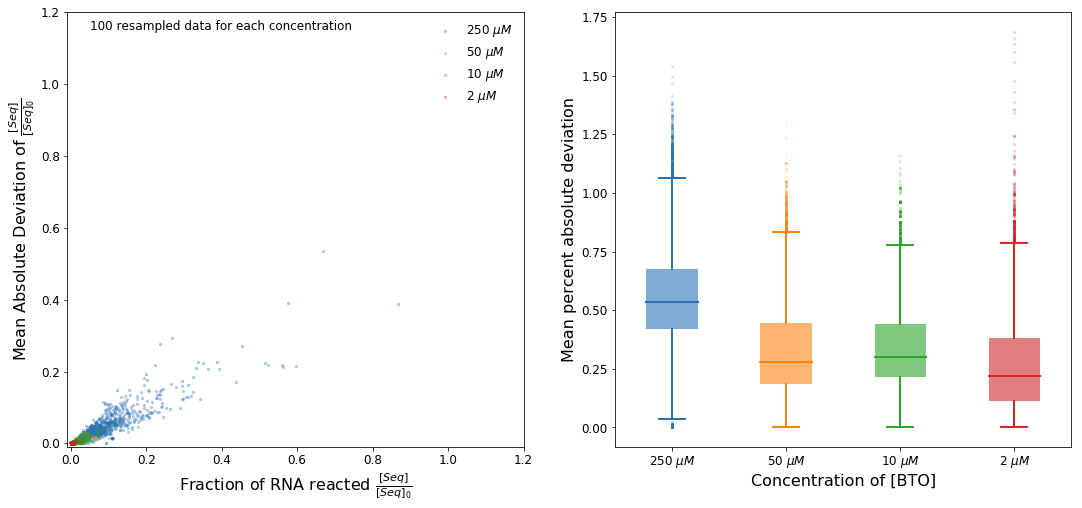

In [2]:
from yntools import load_pickle

def plot_dev_mean(seqErrStat):
    import matplotlib.pyplot as plt
    import matplotlib.lines as mlines
    import numpy as np
    
    devMean = [[[seq[2][concentration][0], seq[2][concentration][2]] 
                for seq in seqErrStat if len(seq[2][concentration])>0]
                for concentration in range(4)]
    
    fig, ax = plt.subplots(1, 2, figsize=[18,8])
    colormap = ['#2C73B4', '#FC820D', '#2EA32C', '#D32728']
    concentrationMap = [r'250 $\mu M$', r'50 $\mu M$', r'10 $\mu M$', r'2 $\mu M$']
    
    for concentration in range(4):
        idx = np.random.choice(len(devMean[concentration]), size=1000, replace=False)
        data = np.array([devMean[concentration][ix] for ix in idx]).transpose()
        ax[0].scatter(data[0], data[1], s=5, alpha=0.3, 
                      color=colormap[concentration], label=concentrationMap[concentration])
    
    ax[0].set_xlabel(r'Fraction of RNA reacted $\frac{[Seq]}{[Seq]_0}$', fontsize=16)
    ax[0].set_ylabel(r'Mean Absolute Deviation of $\frac{[Seq]}{[Seq]_0}$', fontsize=16)
    ax[0].set_ylim([-0.01, 1.2])
    ax[0].set_xlim([-0.01, 1.2])
    for tick in ax[0].xaxis.get_major_ticks():
        tick.label.set_fontsize(12)
    for tick in ax[0].yaxis.get_major_ticks():
        tick.label.set_fontsize(12)
    
    ax[0].text(0.05, 1.15, '100 resampled data for each concentration', fontsize=12)
    ax[0].legend(frameon=False, fontsize=12)
    
    data = []
    
    print('|Concentration | Mean | Std |')
    print('|--|--|--|')
    for concentration in range(4):
        data.append([seq[1]/seq[0] for seq in devMean[concentration]])
        print('|%s | %1.9r | %1.9r |' %(concentrationMap[concentration],
                                                         np.mean(data[-1]),
                                                         np.std(data[-1])))
    
    bplot = ax[1].boxplot(data, positions=[1, 2, 3, 4], patch_artist=True, showfliers=True)
    for ix,box in enumerate(bplot['boxes']):
        box.set(linewidth=0)
        box.set(facecolor = colormap[ix], alpha=0.6)
    for ix, whisker in enumerate(bplot['whiskers']):
        whisker.set(color = colormap[round(ix/2 - 0.1)], linewidth=2)
    for ix, median in enumerate(bplot['medians']):
        median.set(color = colormap[ix], linewidth=2)
    for ix, cap in enumerate(bplot['caps']):
        cap.set(color = colormap[round(ix/2 - 0.1)], linewidth=2)
    for ix, flier in enumerate(bplot['fliers']):
        flier.set(markerfacecolor = colormap[ix], markersize=3, marker='o', markeredgecolor='none', alpha=0.2)
    ax[1].set_xlabel('Concentration of [BTO]', fontsize=16)
    ax[1].set_ylabel('Mean percent absolute deviation', fontsize=16)
    for tick in ax[1].xaxis.get_major_ticks():
        tick.label.set_fontsize(12)
    for tick in ax[1].yaxis.get_major_ticks():
        tick.label.set_fontsize(12)
    plt.xticks([1,2,3,4], concentrationMap)
    
    fig.savefig('/home/yuning/Work/ribozyme_pred/fig/sample_error.jpeg', dpi=300)
    plt.show()
    
if __name__=='__main__':
    seqErrStat = load_pickle('/home/yuning/Work/ribozyme_pred/data/k_seq/seq_err_stat_non_empty_in_r5_INT_STD.pkl')
    plot_dev_mean(seqErrStat=seqErrStat)

## Error estimation based on median and MAD

In [ ]:
def get_validSeqList():
    '''
    Get a list of sequences that have at least 1 concentration with >=3 replicates
    '''
    import numpy as np
    
    detectedSeqList = load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/labeled_count_table_all_in_r5_INT_STD.pkl')
    validSeqList = {seq[0]:[seq[1], [np.nan for _ in range(25)]] for seq in detectedSeqList}
    
    root = '/mnt/storage/projects/ribozyme_predict/data/count-file/'
    kSeqList = ['counts-1A.txt','counts-1B.txt','counts-1C.txt','counts-1D.txt','counts-1E.txt','counts-1F.txt',
                'counts-2A.txt','counts-2B.txt','counts-2C.txt','counts-2D.txt','counts-2E.txt','counts-2F.txt',
                'counts-3A.txt','counts-3B.txt','counts-3C.txt','counts-3D.txt','counts-3E.txt','counts-3F.txt',
                'counts-4A.txt','counts-4B.txt','counts-4C.txt','counts-4D.txt','counts-4E.txt','counts-4F.txt']
    stdSeq='AAAAACAAAAACAAAAACAAA'
    
    blackList = [9, 17]
    stdCounts = []
    
    for sampleIx, sampleDirc in enumerate([r5Dirc] + kSeqList):
        with open(root + sampleDirc) as file:
            next(file)
            next(file)
            next(file)
            for line in file:
                if line.strip().split()[0] in completeSeqList.keys():
                    completeSeqList[line.strip().split()[0]][1][sampleIx] = int(line.strip().split()[1])
    print("%i sequences are detected in all valid samples" %len(completeSeqList))        
    for seq in completeSeqList.values():
        if len([1 for i in seq[0] if i>0])!= len([1 for i in seq[1] if i>0]):
            print("Following sequence's valid samples do not match: \n %s" %seq)
    return list(completeSeqList.items())


## Error and counts dependency

In [160]:
from yntools import load_pickle

def get_completeSeqList():
    labeledCountTable = load_pickle('/mnt/storage/projects/ribozyme_predict/data/k_seq/labeled_count_table_all_in_r5_INT_STD.pkl')
    completeSeqList = {seq[0]:[seq[1], [0 for _ in range(25)]] for seq in labeledCountTable if seq[2]}
    
    root = '/mnt/storage/projects/ribozyme_predict/data/count-file/'
    kSeqList = ['counts-1A.txt','counts-1B.txt','counts-1C.txt','counts-1D.txt','counts-1E.txt','counts-1F.txt',
                'counts-2A.txt','counts-2B.txt','counts-2C.txt','counts-2D.txt','counts-2E.txt','counts-2F.txt',
                'counts-3A.txt','counts-3B.txt','counts-3C.txt','counts-3D.txt','counts-3E.txt','counts-3F.txt',
                'counts-4A.txt','counts-4B.txt','counts-4C.txt','counts-4D.txt','counts-4E.txt','counts-4F.txt']
    r5Dirc = 'R5c-counts.txt'
    
    for sampleIx, sampleDirc in enumerate([r5Dirc] + kSeqList):
        with open(root + sampleDirc) as file:
            next(file)
            next(file)
            next(file)
            for line in file:
                if line.strip().split()[0] in completeSeqList.keys():
                    completeSeqList[line.strip().split()[0]][1][sampleIx] = int(line.strip().split()[1])
    print("%i sequences are detected in all valid samples" %len(completeSeqList))        
    for seq in completeSeqList.values():
        if len([1 for i in seq[0] if i>0])!= len([1 for i in seq[1] if i>0]):
            print("Following sequence's valid samples do not match: \n %s" %seq)
    return list(completeSeqList.items())


def get_deviation(completeSeqList):
    import numpy as np
    
    rndToAvg = [
        [1, 2, 3, 4, 5, 6],
        [7, 8, 9, 10, 11, 12],
        [13, 14, 15, 16, 17, 18],
        [19, 20, 21, 22, 23, 24]
    ]
    completeSeqDevList = []
    for seq in completeSeqList:
        dev = [0]
        for rndGroup in rndToAvg:
            rndFrac = np.array([seq[1][0][rnd] if seq[1][0][rnd]!=0 else np.nan for rnd in rndGroup])
            dev = dev + list((rndFrac - np.nanmedian(rndFrac))/np.nanmedian(rndFrac))
        completeSeqDevList.append(list(seq) + [dev])
        
    return completeSeqDevList

In [1]:
def plot_scatter():
    import matplotlib.pyplot as plt
    
    fig,ax = plt.subplots(4, 6, figsize=(18, 11))
    
    blackList = [9, 16, 17, 18, 22, 24]
    concentrations = [250, 50, 10, 2]
    
    for x in range(4):
        for y in range(6):
            rnd = x*6 + y + 1
            ax[x,y].text(x=1, y=1, s=r'%i $\mu M$, sample %i' %(concentrations[x], y+1),
                        ha='right', va='bottom', transform = ax[x,y].transAxes)
            ax[x,y].text(x=0, y=1, s=r'$\times$100%',
                        ha='left', va='bottom', transform = ax[x,y].transAxes)
            if rnd in blackList:
                ax[x,y].text(s='Not Valid', x=0.5, y=0.5, ha='center', va='center', fontsize=16)
                pass
            else:
                xdata = [seq[1][1][rnd] for seq in completeSeqDevList]
                ydata = [seq[2][rnd] for seq in completeSeqDevList]
                ax[x,y].scatter(xdata, ydata, alpha=0.3, s=1)
                ax[x,y].set_xticks([0, int(np.max([xdata])/10**5)*10**5])
                ax[x,y].plot([0, np.log10(np.max([xdata]))], [0.5, 0.5], 'k--', alpha=0.8)
                ax[x,y].plot([0, np.log10(np.max([xdata]))], [-0.5, -0.5], 'k--', alpha=0.8)
                ax[x,y].set_xscale('log')
    
    fig.text(x=0.5, y=0, s='Sequence counts detect in the sample (log scale)', ha='center', va='top', fontsize=16)
    fig.text(x=0, y=0.5, s='Percent deviation to median', ha='right', va='center', fontsize=16, rotation='vertical')
    plt.tight_layout()
    
    plt.savefig('/home/yuning/Work/ribozyme_pred/fig/dev_count_scatter.jpeg', dpi=300, bbox_inches='tight')
    plt.show()
    
    
def plot_devThreshold():
    import matplotlib.pyplot as plt
    
    def dev_thresholding(countList, devList, threshold, bins):
        pctList = []
        for i in range(len(bins)-1):
            binnedDev = [devList[ix] for ix,count in enumerate(countList) if bins[i] <= count < bins[i+1]]
            pctList.append(sum([1 for dev in binnedDev if abs(dev) <= threshold])/len(binnedDev))
        return pctList, bins[:-1]

    fig,ax = plt.subplots(4, 6, figsize=(18, 11))
    blackList = [9, 16, 17, 18, 22, 24]
    for x in range(4):
        for y in range(6):
            rnd = x*6 + y + 1
            ax[x,y].text(x=1, y=1, s=r'%i $\mu M$, sample %i' %(concentrations[x], y+1),
                        ha='right', va='bottom', transform = ax[x,y].transAxes)
            ax[x,y].text(x=0, y=1, s=r'$\times$100%',
                        ha='left', va='bottom', transform = ax[x,y].transAxes)
            if rnd in blackList:
                ax[x,y].text(s='Not Valid', x=0.5, y=0.5, ha='center', va='center', fontsize=16)
            else:
                xdata = [seq[1][1][rnd] for seq in completeSeqDevList]
                ydata = [seq[2][rnd] for seq in completeSeqDevList]
                bins = np.logspace(0, 5, 20)
                for threshold in [0.2, 0.5, 0.8]:
                    devPctList, binPos = dev_thresholding(countList=xdata, devList=ydata, threshold=threshold, bins=bins)
                    ax[x,y].plot(binPos, devPctList, 'o-', markersize=2, label=str(threshold))
                ax[x,y].set_xscale('log')
                ax[x,y]
    fig.text(x=0.5, y=0, s='Sequence counts detect in the sample (log scale)', ha='center', va='top', fontsize=16)
    fig.text(x=0, y=0.5, s='Percentage of sequences within the deviation threshold', ha='right', va='center', fontsize=16, rotation=90)
    fig.text(x=0.8, y=0.0, s='---20%', color='#1f77b4', ha='left', va='top', fontsize=16)
    fig.text(x=0.85, y=0.0, s='---50%', color='#ff7f0e', ha='left', va='top', fontsize=16)
    fig.text(x=0.9, y=0.0, s='---80%', color='#2ca02c', ha='left', va='top', fontsize=16)
    
    plt.tight_layout()

    plt.savefig('/home/yuning/Work/ribozyme_pred/fig/dev_count_threshold.jpeg', dpi=300, bbox_inches='tight')
    plt.show()

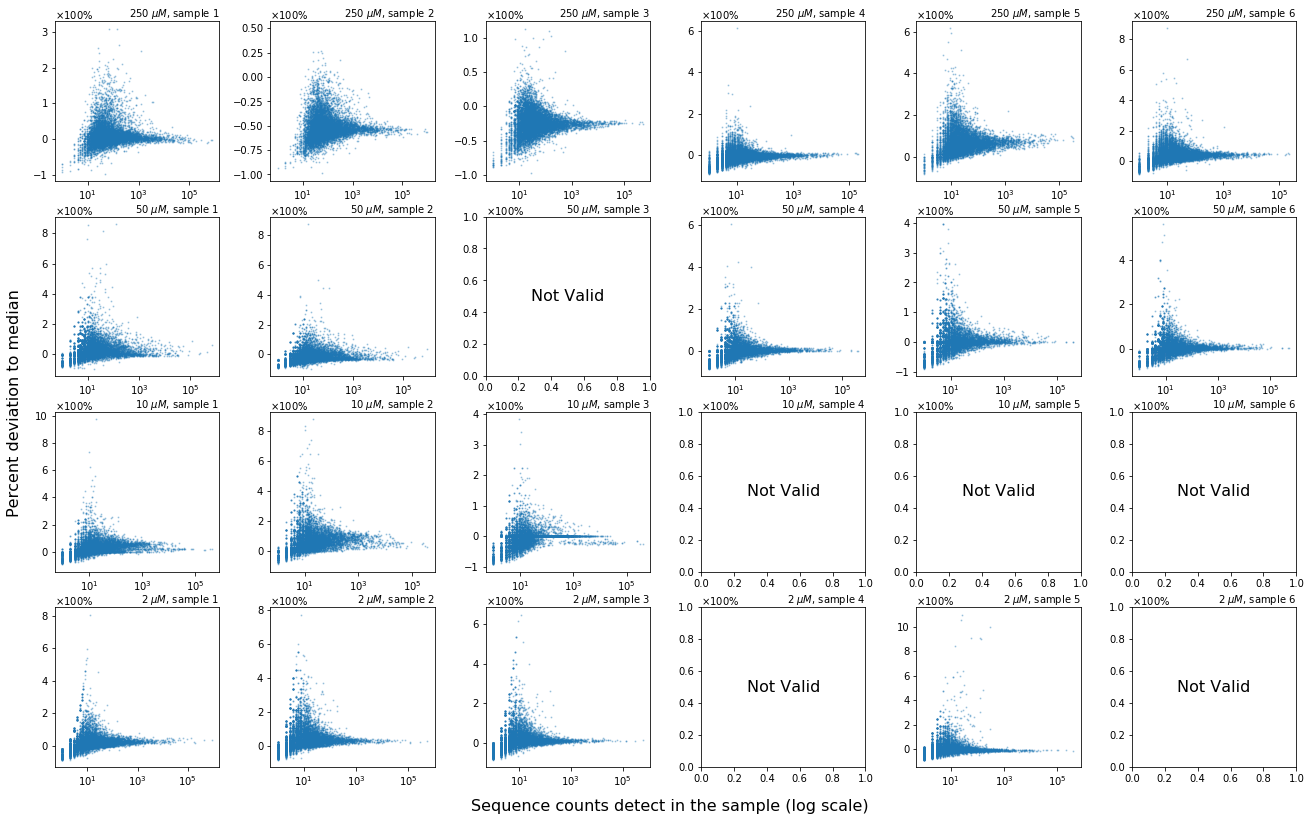

In [199]:
plot_scatter()

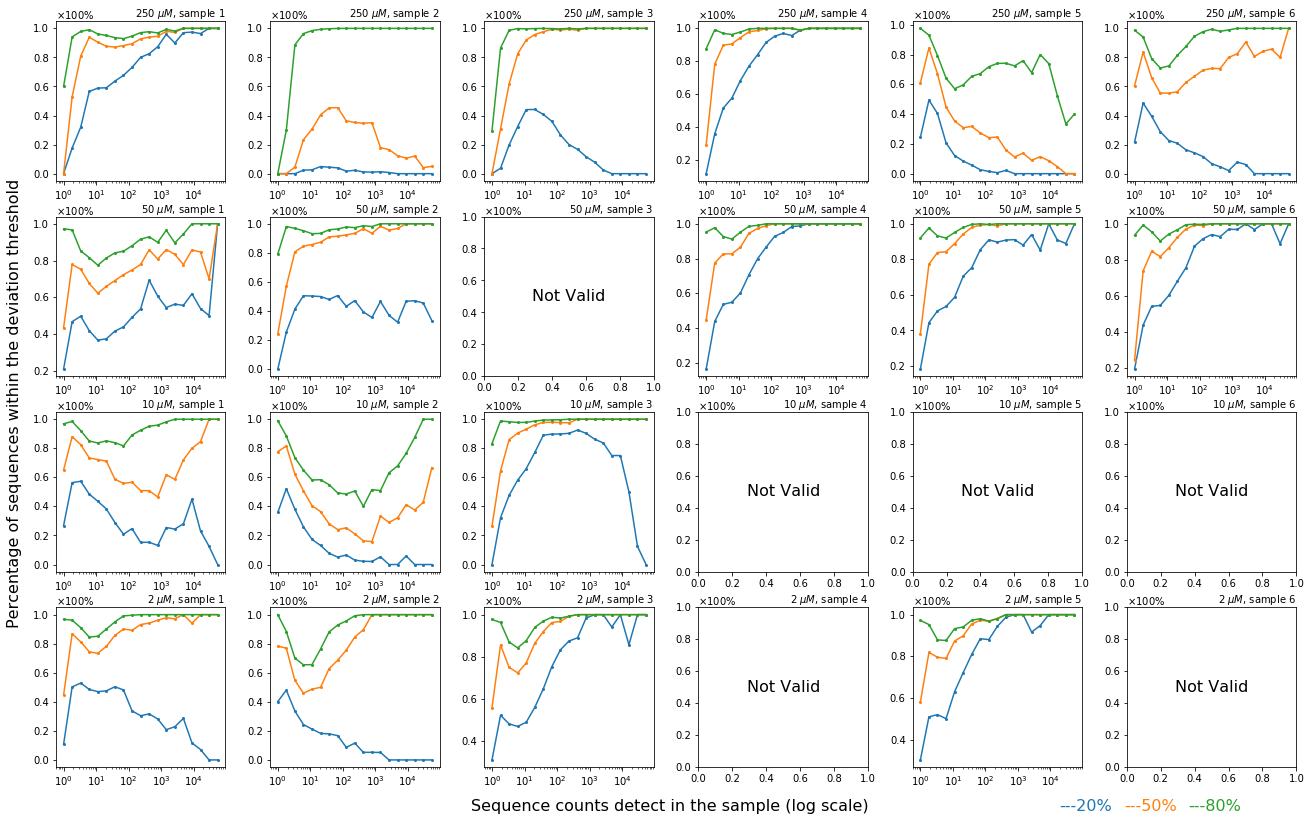

In [202]:
plot_devThreshold()

# Count data

In [13]:
from scipy.stats import poisson

poisson.cdf(0, 10)ˆ

4.539992976248486e-05